In [1]:
import anndata as ad
import numpy as np
import pandas as pd
import scanpy as sc
import csv
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_blobs
import colorcet as cc
from matplotlib.colors import ListedColormap
import re

In [3]:
import pybiomart

In [4]:
HBM936_MHTZ_834_m = sc.read_h5ad("secondary_analysis_HBM936_MHTZ_834_m.h5ad") # left kidney

In [5]:
HBM964_BVWP_737_m = sc.read_h5ad("secondary_analysis_HBM964_BVWP_737_m.h5ad")

In [6]:
HBM648_DKQK_874_f = sc.read_h5ad("secondary_analysis_HBM648_DKQK_874_f.h5ad")

In [7]:
HBM628_QKGB_497_m = sc.read_h5ad("secondary_analysis_HBM628_QKGB_497_m.h5ad")

In [8]:
HBM597_PBJW_593_f = sc.read_h5ad("secondary_analysis_HBM597_PBJW_593_f.h5ad")

In [9]:
HBM425_GDJT_648_m = sc.read_h5ad("secondary_analysis_HBM425_GDJT_648_m.h5ad")

In [14]:
#HBM363_TBHH_346_f = sc.read_h5ad("secondary_analysis_HBM363_TBHH_346.h5ad")

### Creating stacked barplot for all cell counts

In [15]:
HBM936_MHTZ_834_m_barplot = HBM936_MHTZ_834_m.obs['predicted_label'].value_counts().reset_index().rename(columns = {'count' : 'HBM936_MHTZ_834'})

In [16]:
HBM964_BVWP_737_m_barplot = HBM964_BVWP_737_m.obs['predicted_label'].value_counts().reset_index().rename(columns = {'count' : 'HBM964_BVWP_737'})

In [17]:
HBM648_DKQK_874_f_barplot = HBM648_DKQK_874_f.obs['predicted_label'].value_counts().reset_index().rename(columns = {'count' : 'HBM648_DKQK_874'})

In [18]:
HBM628_QKGB_497_m_barplot = HBM628_QKGB_497_m.obs['predicted_label'].value_counts().reset_index().rename(columns = {'count' : 'HBM628_QKGB_497'})

In [19]:
HBM597_PBJW_593_f_barplot = HBM597_PBJW_593_f.obs['predicted_label'].value_counts().reset_index().rename(columns = {'count' : 'HBM597_PBJW_593'})

In [20]:
HBM425_GDJT_648_m_barplot = HBM425_GDJT_648_m.obs['predicted_label'].value_counts().reset_index().rename(columns = {'count' : 'HBM425_GDJT_648'})

In [21]:
merge_first = pd.merge(HBM936_MHTZ_834_m_barplot, HBM964_BVWP_737_m_barplot, on = 'predicted_label', how = 'outer')

In [22]:
merge_second = pd.merge(merge_first, HBM648_DKQK_874_f_barplot, on = 'predicted_label', how = 'outer')

In [23]:
merge_third = pd.merge(merge_second, HBM628_QKGB_497_m_barplot, on = 'predicted_label', how = 'outer')

In [24]:
merge_fourth = pd.merge(merge_third, HBM597_PBJW_593_f_barplot, on = 'predicted_label', how = 'outer')

In [25]:
merge_fifth = pd.merge(merge_fourth, HBM425_GDJT_648_m_barplot, on = 'predicted_label', how = 'outer')

In [26]:
stacked_barplot_df = merge_fifth.fillna(0)

In [27]:
stacked_barplot_df.to_csv("stacked_barplot_df.csv")

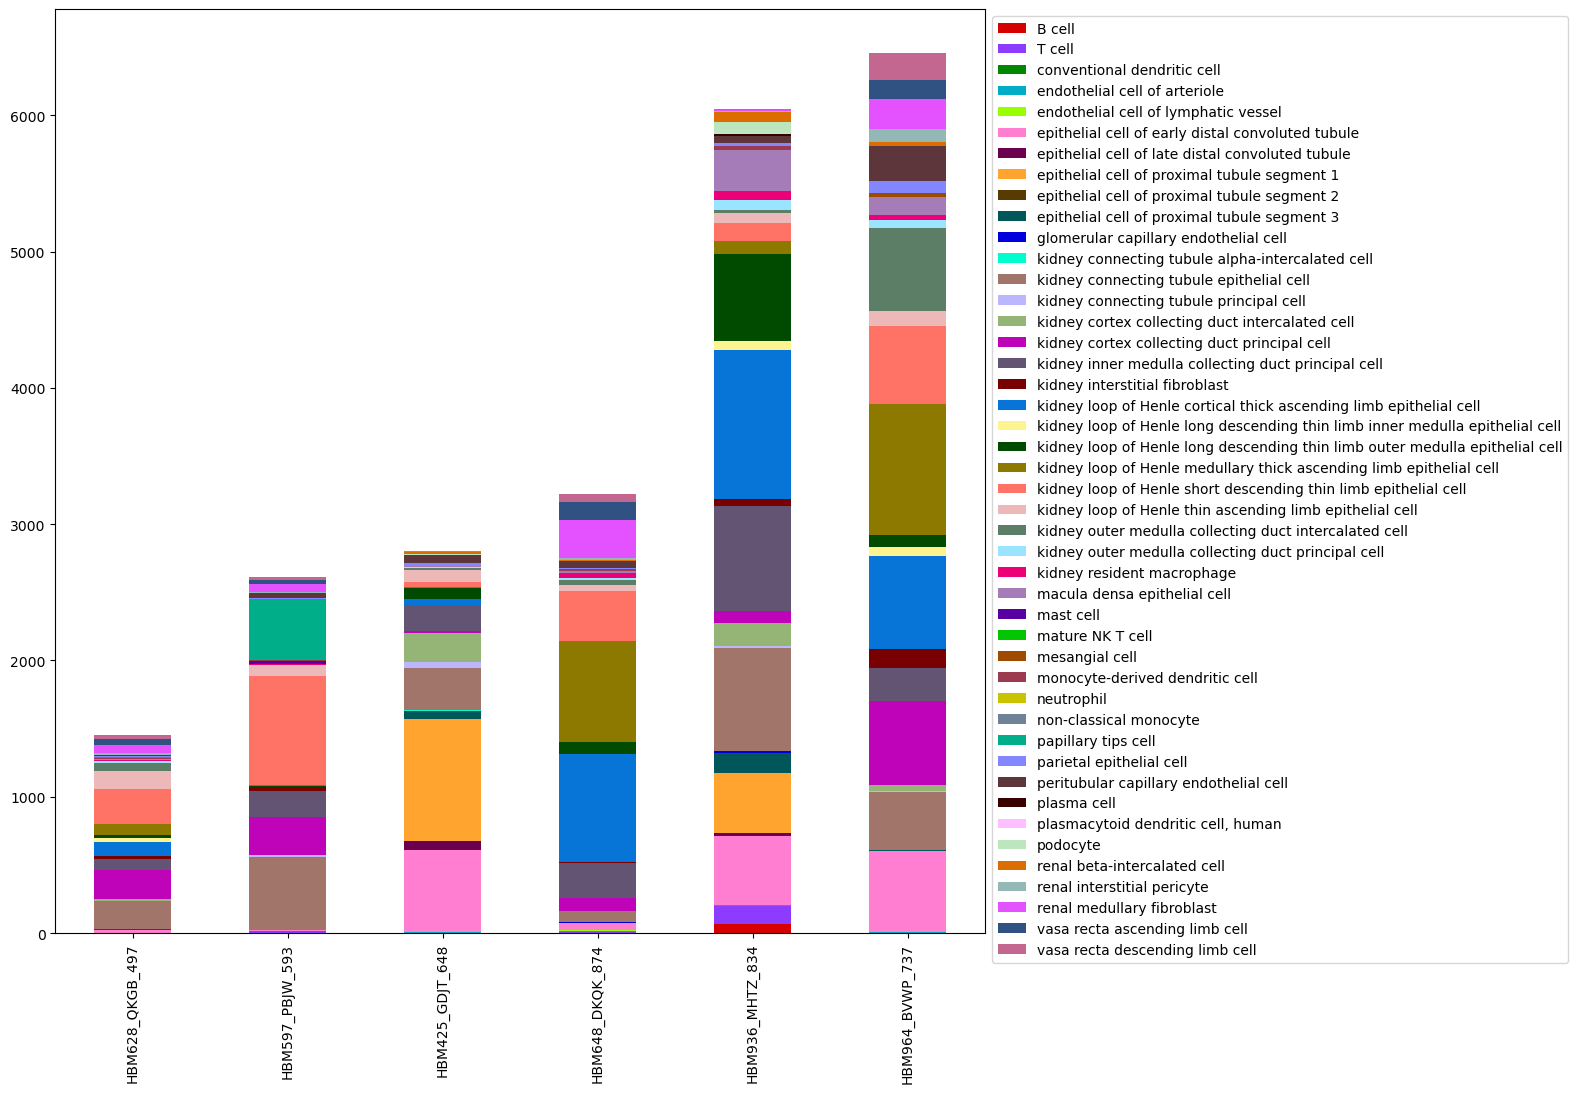

In [28]:
palette = sb.color_palette(cc.glasbey, n_colors=45)

stacked_barplot_df.set_index('predicted_label')\
  .reindex(stacked_barplot_df.set_index('predicted_label').sum().sort_values().index, axis=1)\
  .T.plot(kind='bar', stacked=True,
          colormap=ListedColormap(sb.color_palette(palette)), 
          figsize=(12,12))
plt.legend(ncol=1, bbox_to_anchor=(1, 1))

In [29]:
all_cell_percentages = pd.read_csv("allcelltypes_percentages.csv", sep = ',', low_memory = False)

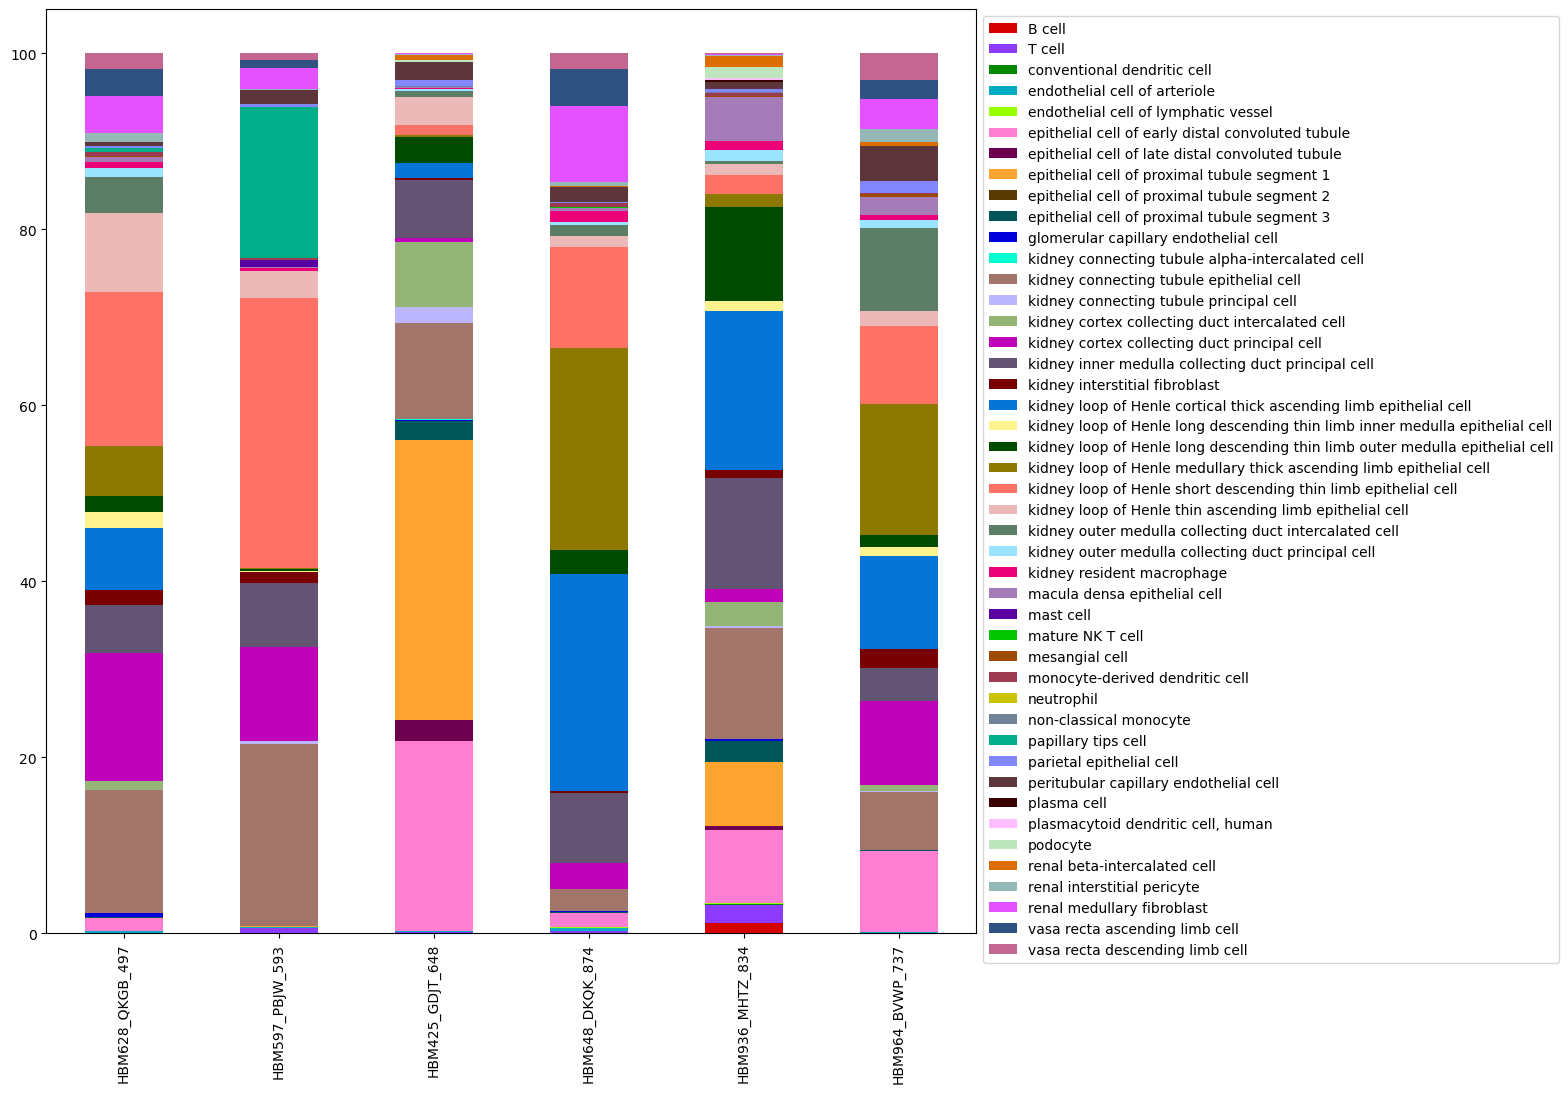

In [30]:
palette4 = sb.color_palette(cc.glasbey, n_colors=45)

all_cell_percentages.set_index('predicted_label')\
  .reindex(all_cell_percentages.set_index('predicted_label').sum().index, axis=1)\
  .T.plot(kind='bar', stacked=True,
          colormap=ListedColormap(sb.color_palette(palette)), 
          figsize=(12,12))
plt.legend(ncol=1, bbox_to_anchor=(1, 1))

In [31]:
common_cell_prop = pd.read_csv("common_celltype_proportions.csv", sep = ',', low_memory = False)

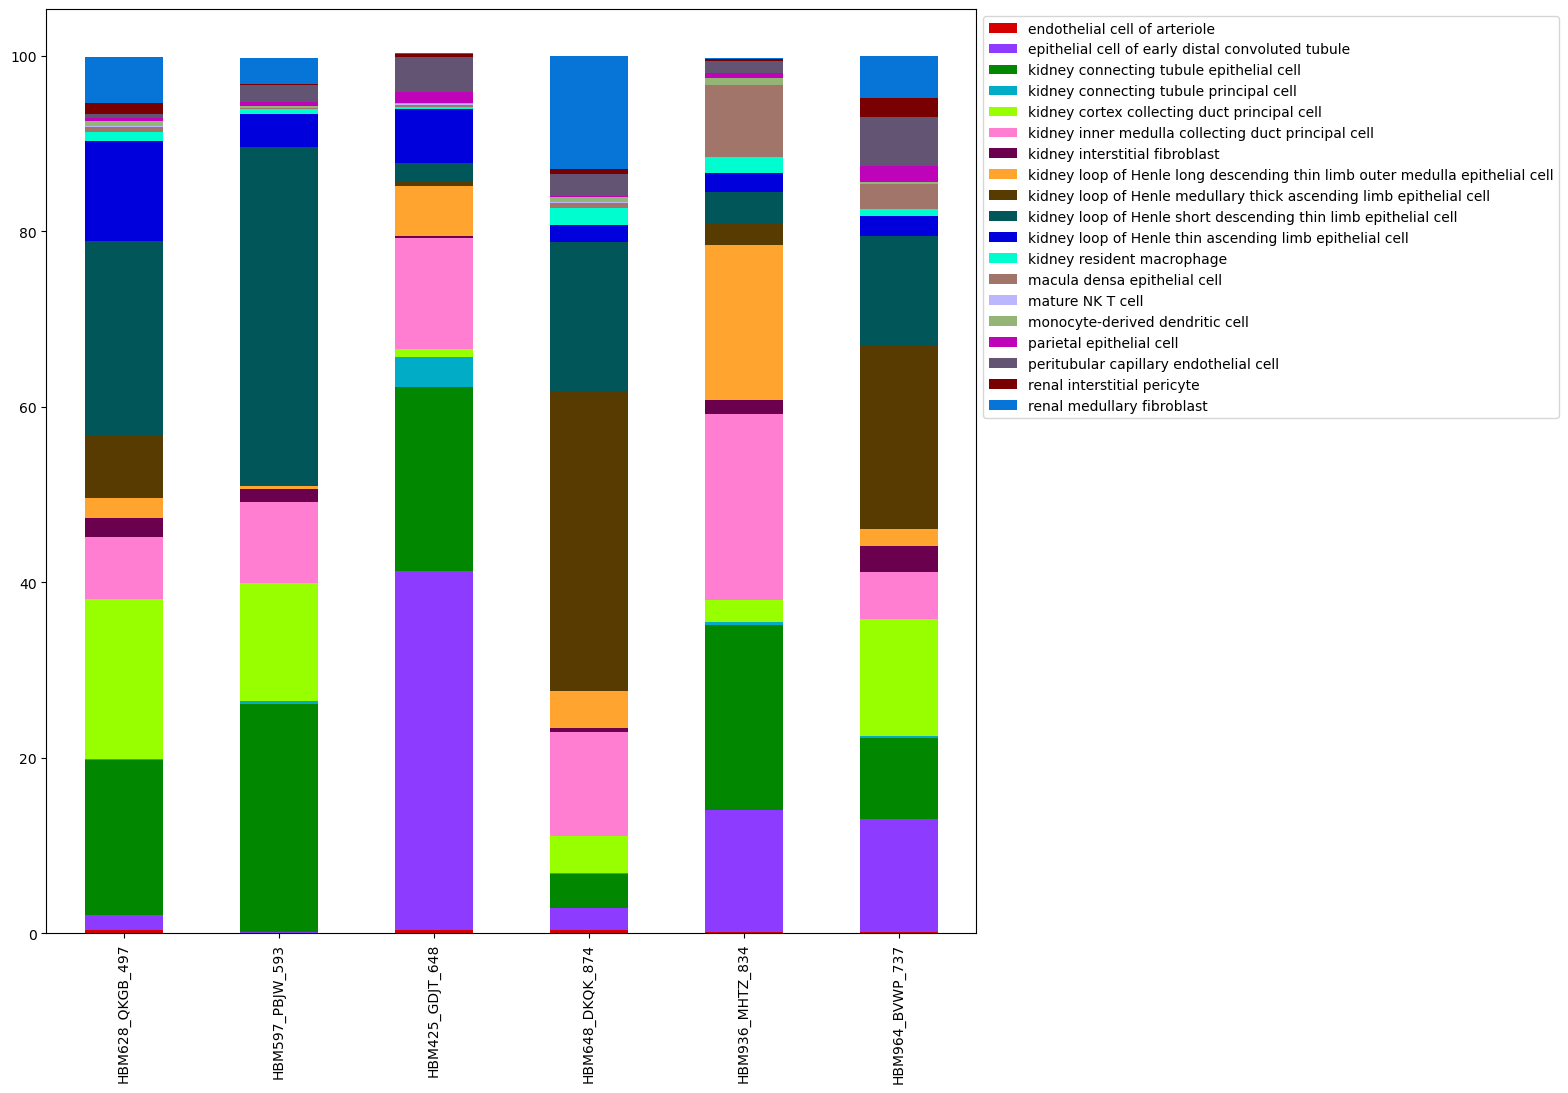

In [32]:
palette3 = sb.color_palette(cc.glasbey, n_colors=19)

common_cell_prop.set_index('predicted_label')\
  .reindex(common_cell_prop.set_index('predicted_label').sum().index, axis=1)\
  .T.plot(kind='bar', stacked=True,
          colormap=ListedColormap(sb.color_palette(palette3)), 
          figsize=(12,12))
plt.legend(ncol=1, bbox_to_anchor=(1, 1))

In [10]:
HBM936_MHTZ_834_m_df = HBM936_MHTZ_834_m.to_df()
HBM936_MHTZ_834_m_df.reset_index(inplace=True)
HBM936_MHTZ_834_m_df.set_index('index', inplace=True)
HBM936_MHTZ_834_m_df['predicted_label'] = list(HBM936_MHTZ_834_m.obs['predicted_label'])
HBM936_MHTZ_834_barcode_label = HBM936_MHTZ_834_m_df['predicted_label'].reset_index()
HBM936_MHTZ_834_labels = pd.DataFrame(pd.Categorical(HBM936_MHTZ_834_m_df['predicted_label']).categories, columns = ["labels"])
HBM936_MHTZ_834_m_df = HBM936_MHTZ_834_m_df.drop('predicted_label', axis = 1)

In [11]:
HBM964_BVWP_737_m_df = HBM964_BVWP_737_m.to_df()
HBM964_BVWP_737_m_df.reset_index(inplace=True)
HBM964_BVWP_737_m_df.set_index('index', inplace=True)
HBM964_BVWP_737_m_df['predicted_label'] = list(HBM964_BVWP_737_m.obs['predicted_label'])
HBM964_BVWP_737_barcode_label = HBM964_BVWP_737_m_df['predicted_label'].reset_index()
HBM964_BVWP_737_labels = pd.DataFrame(pd.Categorical(HBM964_BVWP_737_m_df['predicted_label']).categories, columns = ["labels"])
HBM964_BVWP_737_m_df = HBM964_BVWP_737_m_df.drop('predicted_label', axis = 1)


In [12]:
HBM648_DKQK_874_f_df = HBM648_DKQK_874_f.to_df()
HBM648_DKQK_874_f_df.reset_index(inplace=True)
HBM648_DKQK_874_f_df.set_index('index', inplace=True)
HBM648_DKQK_874_f_df['predicted_label'] = list(HBM648_DKQK_874_f.obs['predicted_label'])
HBM648_DKQK_874_barcode_label = HBM648_DKQK_874_f_df['predicted_label'].reset_index()
HBM648_DKQK_874_labels = pd.DataFrame(pd.Categorical(HBM648_DKQK_874_f_df['predicted_label']).categories, columns = ["labels"])

HBM648_DKQK_874_f_df = HBM648_DKQK_874_f_df.drop('predicted_label', axis = 1)


In [13]:
HBM628_QKGB_497_m_df = HBM628_QKGB_497_m.to_df()
HBM628_QKGB_497_m_df.reset_index(inplace=True)
HBM628_QKGB_497_m_df.set_index('index', inplace=True)
HBM628_QKGB_497_m_df['predicted_label'] = list(HBM628_QKGB_497_m.obs['predicted_label'])
HBM628_QKGB_497_barcode_label = HBM628_QKGB_497_m_df['predicted_label'].reset_index()
HBM628_QKGB_497_labels = pd.DataFrame(pd.Categorical(HBM628_QKGB_497_m_df['predicted_label']).categories, columns = ["labels"])

HBM628_QKGB_497_m_df = HBM628_QKGB_497_m_df.drop('predicted_label', axis = 1)


In [14]:
HBM597_PBJW_593_f_df = HBM597_PBJW_593_f.to_df()
HBM597_PBJW_593_f_df.reset_index(inplace=True)
HBM597_PBJW_593_f_df.set_index('index', inplace=True)
HBM597_PBJW_593_f_df['predicted_label'] = list(HBM597_PBJW_593_f.obs['predicted_label'])
HBM597_PBJW_593_barcode_label = HBM597_PBJW_593_f_df['predicted_label'].reset_index()
HBM597_PBJW_593_labels = pd.DataFrame(pd.Categorical(HBM597_PBJW_593_f_df['predicted_label']).categories, columns = ["labels"])

HBM597_PBJW_593_f_df = HBM597_PBJW_593_f_df.drop('predicted_label', axis = 1)


In [15]:
HBM425_GDJT_648_m_df = HBM425_GDJT_648_m.to_df()
HBM425_GDJT_648_m_df.reset_index(inplace=True)
HBM425_GDJT_648_m_df.set_index('index', inplace=True)
HBM425_GDJT_648_m_df['predicted_label'] = list(HBM425_GDJT_648_m.obs['predicted_label'])
HBM425_GDJT_648_barcode_label = HBM425_GDJT_648_m_df['predicted_label'].reset_index()
HBM425_GDJT_648_labels = pd.DataFrame(pd.Categorical(HBM425_GDJT_648_m_df['predicted_label']).categories, columns = ["labels"])

HBM425_GDJT_648_m_df = HBM425_GDJT_648_m_df.drop('predicted_label', axis = 1)

In [16]:
first = pd.merge(HBM936_MHTZ_834_labels, HBM964_BVWP_737_labels, on = "labels", how = "inner")
second = pd.merge(first, HBM648_DKQK_874_labels, on = "labels", how = "inner")
third = pd.merge(second, HBM628_QKGB_497_labels, on = "labels", how = "inner")
fourth = pd.merge(third, HBM597_PBJW_593_labels, on = "labels", how = "inner")
fifth = pd.merge(fourth, HBM425_GDJT_648_labels, on = "labels", how = "inner")
fifth.rename(columns = {"labels" : "predicted_label"}, inplace=True)

In [40]:
merged_barplot_commoncells = pd.merge(fifth, stacked_barplot_df, on = 'predicted_label', how = 'inner')

In [41]:
merged_barplot_commoncells = merged_barplot_commoncells[['predicted_label', 'HBM628_QKGB_497', 'HBM597_PBJW_593', 'HBM425_GDJT_648', 'HBM648_DKQK_874', 'HBM936_MHTZ_834', 'HBM964_BVWP_737']]

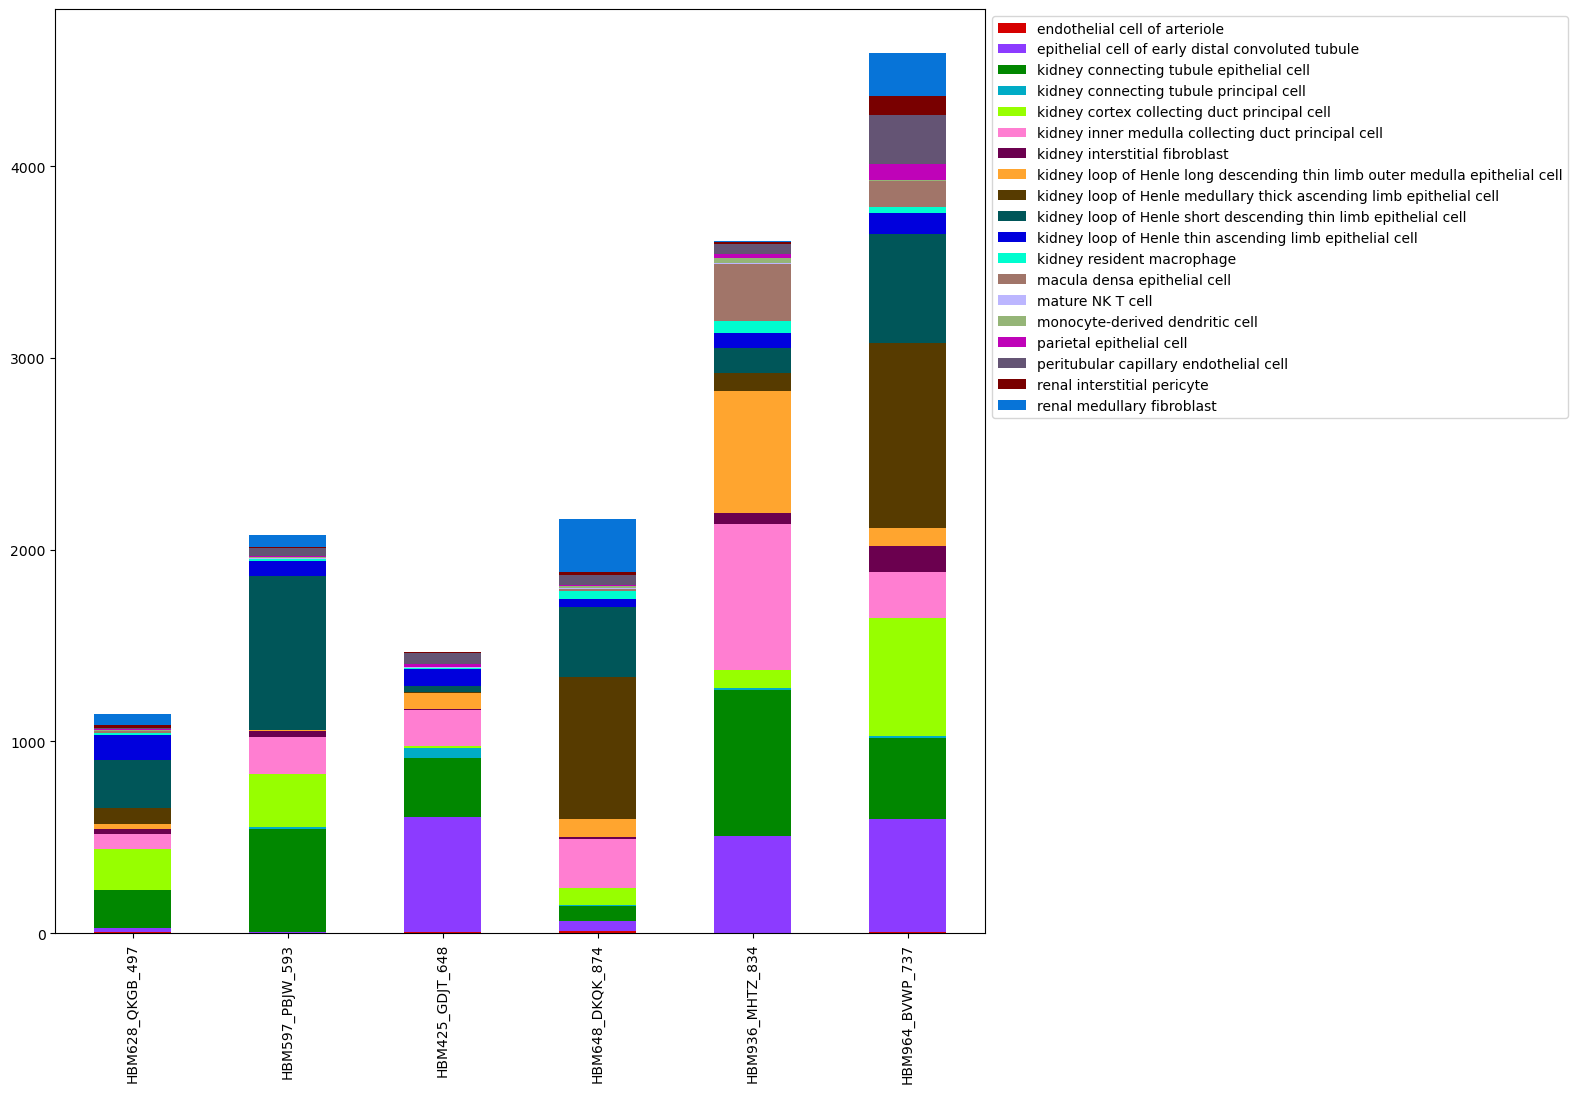

In [42]:
palette2 = sb.color_palette(cc.glasbey, n_colors=19)
merged_barplot_commoncells.set_index('predicted_label')\
  .reindex(merged_barplot_commoncells.set_index('predicted_label').sum().index, axis=1)\
  .T.plot(kind='bar', stacked=True,
          colormap=ListedColormap(sb.color_palette(palette2)), 
          figsize=(12,12))
plt.legend(ncol=1, bbox_to_anchor=(1, 1))

In [43]:
all_common_cellcounts = pd.merge(fifth, stacked_barplot_df, on = 'predicted_label', how = 'inner')

In [44]:
#all_common_cellcounts.to_csv('all_common_cellcounts.csv')

In [45]:
all_common_cellpercentages = pd.read_csv('all_common_cellpercentages.csv', sep = ',', low_memory = False)

In [46]:
all_common_cellpercentages = all_common_cellpercentages.drop('Unnamed: 0', axis = 1)

In [47]:
all_common_cellpercentages

,predicted_label,HBM936_MHTZ_834,HBM964_BVWP_737,HBM648_DKQK_874,HBM628_QKGB_497,HBM597_PBJW_593,HBM425_GDJT_648
0,endothelial cell of arteriole,0.055448,0.087146,0.370199,0.262009,0.048193,0.272480
1,epithelial cell of early distal convoluted tubule,13.945107,12.875817,2.452568,1.834061,0.096386,41.008174
2,kidney connecting tubule epithelial cell,21.097865,9.172113,3.794540,17.641921,26.024096,20.912807
3,kidney connecting tubule principal cell,0.360410,0.217865,0.092550,0.087336,0.385542,3.405995
4,kidney cortex collecting duct principal cell,2.522872,13.420479,4.257288,18.340611,13.445783,0.953678
5,kidney inner medulla collecting duct principal...,21.181037,5.272331,11.846367,6.986900,9.204819,12.602180
6,kidney interstitial fibroblast,1.524813,2.984749,0.462749,2.183406,1.493976,0.272480
7,kidney loop of Henle long descending thin limb...,17.743277,2.047930,4.164739,2.270742,0.289157,5.722071
8,kidney loop of Henle medullary thick ascending...,2.522872,20.915033,34.243406,7.248908,0.144578,0.408719
9,kidney loop of Henle short descending thin lim...,3.631827,12.440087,16.982878,22.096070,38.602410,2.179837


In [17]:
annot = sc.queries.biomart_annotations("hsapiens", ["ensembl_gene_id", "hgnc_symbol"])
annot = annot.dropna().rename(columns = {'ensembl_gene_id' : 'index'})
annot['index'] = annot.dropna()['index'].drop_duplicates()

In [18]:
def match_string(id):
    return re.search(r'^[^.]+', id)[0]

In [19]:
HBM936_MHTZ_834_barcode_label_new = pd.merge(HBM936_MHTZ_834_barcode_label, fifth, on = 'predicted_label', how = 'right')
HBM964_BVWP_737_barcode_label_new = pd.merge(HBM964_BVWP_737_barcode_label, fifth, on = 'predicted_label', how = 'right')
HBM648_DKQK_874_barcode_label_new = pd.merge(HBM648_DKQK_874_barcode_label, fifth, on = 'predicted_label', how = 'right')
HBM628_QKGB_497_barcode_label_new = pd.merge(HBM628_QKGB_497_barcode_label, fifth, on = 'predicted_label', how = 'right')
HBM597_PBJW_593_barcode_label_new = pd.merge(HBM597_PBJW_593_barcode_label, fifth, on = 'predicted_label', how = 'right')
HBM425_GDJT_648_barcode_label_new = pd.merge(HBM425_GDJT_648_barcode_label, fifth, on = 'predicted_label', how = 'right')

# HBM936_MHTZ_834

## Top highly variable genes, original

/opt/anaconda3/lib/python3.12/site-packages/scanpy/experimental/pp/_highly_variable_genes.py:153: UserWarning: `flavor='pearson_residuals'` expects raw count data, but non-integers were found.
  warnings.warn(
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


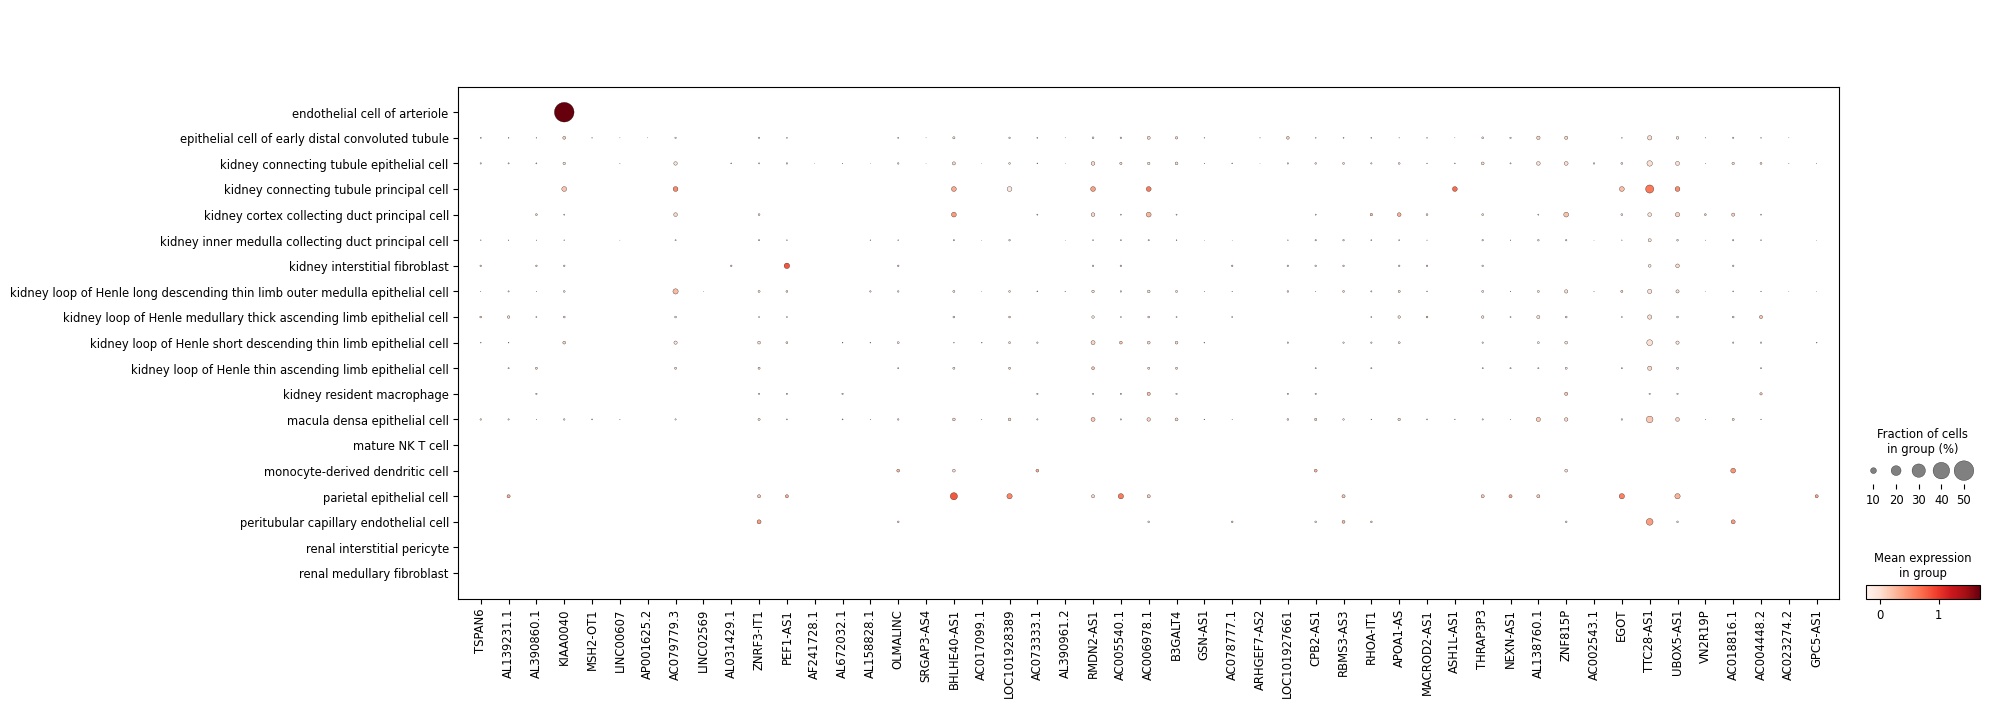

In [51]:
HBM936_MHTZ_834_m_df_common = pd.merge(HBM936_MHTZ_834_m_df, HBM936_MHTZ_834_barcode_label_new, on = 'index', how = 'right')
HBM936_MHTZ_834_m_df_common.set_index('index', inplace=True)
HBM936_MHTZ_834_m_df_common = HBM936_MHTZ_834_m_df_common.drop('predicted_label', axis = 1)


sc.experimental.pp.highly_variable_genes(HBM936_MHTZ_834_m, flavor="pearson_residuals", n_top_genes= 50)
HBM936_MHTZ_834_highly_var = HBM936_MHTZ_834_m.var['highly_variable_rank'].reset_index().dropna()
HBM936_MHTZ_834_hugo_symbols = HBM936_MHTZ_834_m.var['hugo_symbol'].reset_index()                             
HBM936_MHTZ_834_highly_var_hugo = pd.merge(HBM936_MHTZ_834_highly_var, HBM936_MHTZ_834_hugo_symbols, on = 'index', how = 'inner')
HBM936_MHTZ_834_highly_var_rank = HBM936_MHTZ_834_highly_var_hugo['highly_variable_rank']
HBM936_MHTZ_834_highly_var_hugo.set_index('index', inplace=True)
HBM936_MHTZ_834_highly_var_hugo = HBM936_MHTZ_834_highly_var_hugo.drop('highly_variable_rank', axis = 1)
    

HBM936_MHTZ_834_m_df_common = HBM936_MHTZ_834_m_df_common.T


HBM936_MHTZ_834_numeric = HBM936_MHTZ_834_m_df_common.apply(pd.to_numeric)
HBM936_MHTZ_834_numeric.reset_index(inplace=True)
HBM936_MHTZ_834_numeric.set_index('index', inplace=True)
HBM936_MHTZ_834_merged_adata_highly_var_for_cell = pd.merge(HBM936_MHTZ_834_highly_var_hugo, HBM936_MHTZ_834_numeric, on = "index", how = "right")
HBM936_MHTZ_834_merged_adata_highly_var_for_cell = HBM936_MHTZ_834_merged_adata_highly_var_for_cell.dropna()
HBM936_MHTZ_834_hugo_genes = HBM936_MHTZ_834_merged_adata_highly_var_for_cell['hugo_symbol'].dropna()
HBM936_MHTZ_834_hugo_genes = HBM936_MHTZ_834_hugo_genes.reset_index()

HBM936_MHTZ_834_merged_adata_highly_var_for_cell = HBM936_MHTZ_834_merged_adata_highly_var_for_cell.drop('hugo_symbol', axis = 1)


HBM936_MHTZ_834_merged_ready_for_adata = HBM936_MHTZ_834_merged_adata_highly_var_for_cell.T
HBM936_MHTZ_834_adata_selected = ad.AnnData(HBM936_MHTZ_834_merged_ready_for_adata)



HBM936_MHTZ_834_adata_selected.var["hugo_symbol"] = pd.Categorical(HBM936_MHTZ_834_hugo_genes['hugo_symbol'])
HBM936_MHTZ_834_adata_selected.obs["predicted_label"] = pd.Categorical(HBM936_MHTZ_834_barcode_label_new['predicted_label'])


sc.pl.dotplot(HBM936_MHTZ_834_adata_selected, groupby = 'predicted_label', var_names = HBM936_MHTZ_834_hugo_genes['hugo_symbol'], gene_symbols = 'hugo_symbol')

## Gene expression of selected genes

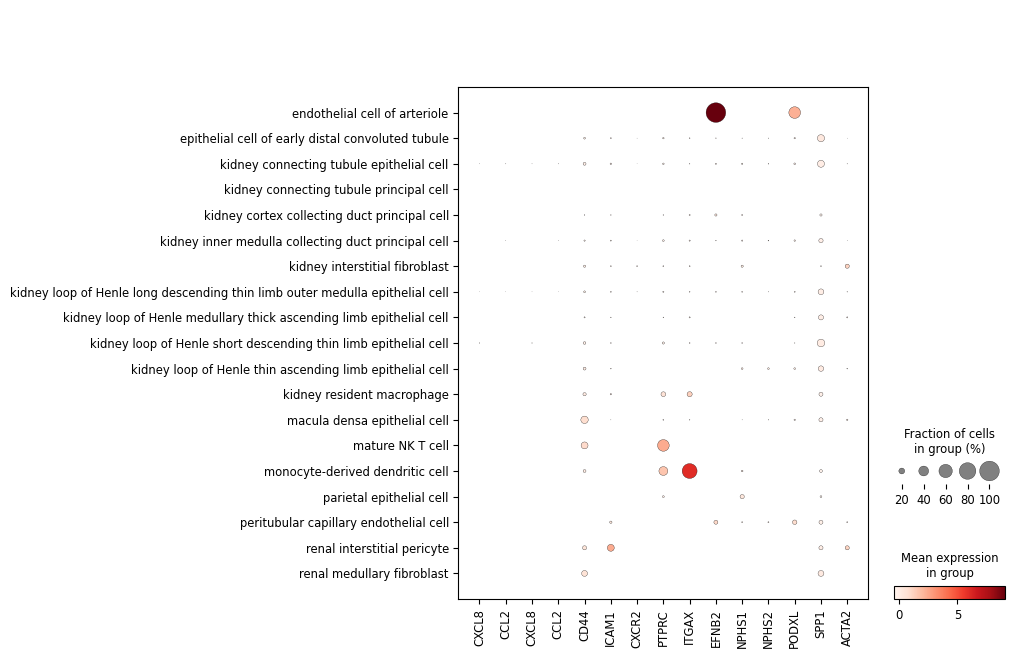

In [52]:
HBM936_MHTZ_834_m_df2 = HBM936_MHTZ_834_m.to_df()
HBM936_MHTZ_834_m_df2 = HBM936_MHTZ_834_m_df2.T.reset_index()
HBM936_MHTZ_834_m_df2['index'] = HBM936_MHTZ_834_m_df2['index'].apply(match_string)
HBM936_MHTZ_834_m_df2.set_index('index', inplace=True)
HBM936_MHTZ_834_m_adata = ad.AnnData(HBM936_MHTZ_834_m_df2.T)
HBM936_MHTZ_834_m_adata.obs['predicted_label'] = HBM936_MHTZ_834_m.obs['predicted_label']


HBM936_MHTZ_834_m_adata.var['hgnc_symbol'] = list(pd.merge(HBM936_MHTZ_834_m_adata.var, annot, on = 'index', how = 'left')['hgnc_symbol'])

HBM936_MHTZ_834_m_adata2 = HBM936_MHTZ_834_m_adata.to_df()
HBM936_MHTZ_834_m_adata2.reset_index(inplace=True)
HBM936_MHTZ_834_m_adata2.set_index('index', inplace=True)
HBM936_MHTZ_834_m_adata2['predicted_label'] = pd.Categorical(HBM936_MHTZ_834_m_adata.obs['predicted_label'])
HBM936_MHTZ_834_m_adata_barcode_label = HBM936_MHTZ_834_m_adata2['predicted_label'].reset_index()
HBM936_MHTZ_834_m_adata2 = HBM936_MHTZ_834_m_adata2.drop('predicted_label', axis = 1)

HBM936_MHTZ_834_m_adata_barcode_label_new = pd.merge(HBM936_MHTZ_834_m_adata_barcode_label, fifth, on = 'predicted_label', how = 'right')
HBM936_MHTZ_834_m_adata2_common = pd.merge(HBM936_MHTZ_834_m_adata2, HBM936_MHTZ_834_m_adata_barcode_label_new, on = 'index', how = 'right')
HBM936_MHTZ_834_m_adata2_common.set_index('index', inplace=True)
HBM936_MHTZ_834_m_adata2_common = HBM936_MHTZ_834_m_adata2_common.drop('predicted_label', axis = 1)
HBM936_MHTZ_834_m_adata2_numeric = HBM936_MHTZ_834_m_adata2_common.apply(pd.to_numeric)
HBM936_MHTZ_834_m_adata2_selected = ad.AnnData(HBM936_MHTZ_834_m_adata2_numeric)
HBM936_MHTZ_834_m_adata2_selected.var["hgnc_symbol"] = pd.Categorical(HBM936_MHTZ_834_m_adata.var['hgnc_symbol'])
HBM936_MHTZ_834_m_adata2_selected.obs["predicted_label"] = pd.Categorical(HBM936_MHTZ_834_m_adata_barcode_label_new['predicted_label'])


gene_list = []

all_selected_genes = ['CXCL8', 'CCL2', 'CXCL8', 'CCL2', 'CD44', 'ICAM1', 'IL1A', 'CXCR2', 'PTPRC', 'ITGAX', 'CSF3', "EFNB2", "NPHS1", "NPHS2", "PODXL", "TPSB2" "C7", "SPP1", "ACTA2"]

for i in all_selected_genes:
    if i in list(HBM936_MHTZ_834_m_adata.var['hgnc_symbol'].dropna()):
        gene_list.append(i)

sc.pl.dotplot(HBM936_MHTZ_834_m_adata2_selected, groupby = 'predicted_label', var_names = gene_list, gene_symbols = 'hgnc_symbol')

## Top highly variable genes, HGNC annotations from Ensembl

/opt/anaconda3/lib/python3.12/site-packages/scanpy/experimental/pp/_highly_variable_genes.py:153: UserWarning: `flavor='pearson_residuals'` expects raw count data, but non-integers were found.
  warnings.warn(


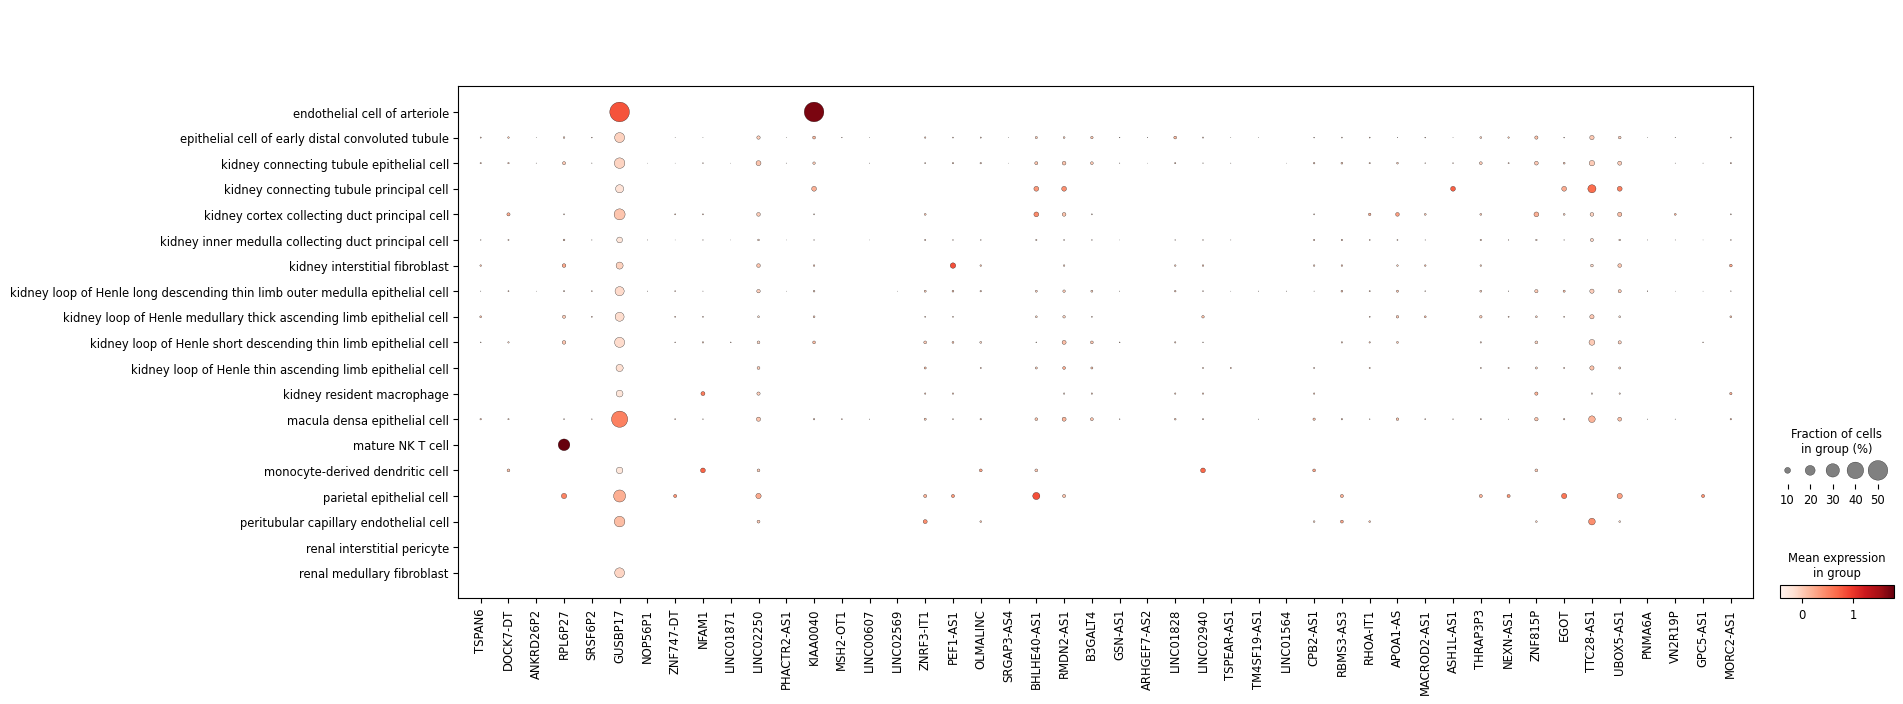

In [53]:
HBM936_MHTZ_834_m_df_dotplot3 = HBM936_MHTZ_834_m.to_df()
HBM936_MHTZ_834_m_df_dotplot3 = HBM936_MHTZ_834_m_df_dotplot3.T.reset_index()
HBM936_MHTZ_834_m_df_dotplot3['index'] = HBM936_MHTZ_834_m_df_dotplot3['index'].apply(match_string)
HBM936_MHTZ_834_m_df_dotplot3.set_index('index', inplace=True)
HBM936_MHTZ_834_m_adata3 = ad.AnnData(HBM936_MHTZ_834_m_df_dotplot3.T)
HBM936_MHTZ_834_m_adata3.obs['predicted_label'] = HBM936_MHTZ_834_m.obs['predicted_label']
HBM936_MHTZ_834_m_adata3.var['hgnc_symbol'] = list(pd.merge(HBM936_MHTZ_834_m_adata3.var, annot, on = 'index', how = 'left')['hgnc_symbol'])


HBM936_MHTZ_834_m_df_adata3 = HBM936_MHTZ_834_m_adata3.to_df()
HBM936_MHTZ_834_m_df_adata3.reset_index(inplace=True)
HBM936_MHTZ_834_m_df_adata3.set_index('index', inplace=True)
HBM936_MHTZ_834_m_df_adata3['predicted_label'] = list(HBM936_MHTZ_834_m_adata3.obs['predicted_label'])
HBM936_MHTZ_834_barcode_label_adata3 = HBM936_MHTZ_834_m_df_adata3['predicted_label'].reset_index()
HBM936_MHTZ_834_m_df_adata3 = HBM936_MHTZ_834_m_df_adata3.drop('predicted_label', axis = 1)


HBM936_MHTZ_834_m_adata3_barcode_label_new = pd.merge(HBM936_MHTZ_834_barcode_label_adata3, fifth, on = 'predicted_label', how = 'right')
HBM936_MHTZ_834_m_adata3_common = pd.merge(HBM936_MHTZ_834_m_df_adata3, HBM936_MHTZ_834_m_adata3_barcode_label_new, on = 'index', how = 'right')
HBM936_MHTZ_834_m_adata3_common.set_index('index', inplace=True)
HBM936_MHTZ_834_m_adata3_common = HBM936_MHTZ_834_m_adata3_common.drop('predicted_label', axis = 1)


sc.experimental.pp.highly_variable_genes(HBM936_MHTZ_834_m_adata3, flavor="pearson_residuals", n_top_genes= 70)
HBM936_MHTZ_834_highly_var3 = HBM936_MHTZ_834_m_adata3.var['highly_variable_rank'].reset_index().dropna()
HBM936_MHTZ_834_hugo_symbols3 = HBM936_MHTZ_834_m_adata3.var['hgnc_symbol'].reset_index()                             
HBM936_MHTZ_834_highly_var_hugo3 = pd.merge(HBM936_MHTZ_834_highly_var3, HBM936_MHTZ_834_hugo_symbols3, on = 'index', how = 'inner')
HBM936_MHTZ_834_highly_var_rank3 = HBM936_MHTZ_834_highly_var_hugo3['highly_variable_rank']
HBM936_MHTZ_834_highly_var_hugo3.set_index('index', inplace=True)
HBM936_MHTZ_834_highly_var_hugo3 = HBM936_MHTZ_834_highly_var_hugo3.drop('highly_variable_rank', axis = 1)


HBM936_MHTZ_834_m_adata3_common = HBM936_MHTZ_834_m_adata3_common.T


HBM936_MHTZ_834_numeric3 = HBM936_MHTZ_834_m_adata3_common.apply(pd.to_numeric)
HBM936_MHTZ_834_numeric3.reset_index(inplace=True)
HBM936_MHTZ_834_numeric3.set_index('index', inplace=True)
HBM936_MHTZ_834_merged_adata_highly_var_for_cell3 = pd.merge(HBM936_MHTZ_834_highly_var_hugo3, HBM936_MHTZ_834_numeric3, on = "index", how = "right")
HBM936_MHTZ_834_merged_adata_highly_var_for_cell3 = HBM936_MHTZ_834_merged_adata_highly_var_for_cell3.dropna()
HBM936_MHTZ_834_hugo_genes3 = HBM936_MHTZ_834_merged_adata_highly_var_for_cell3['hgnc_symbol'].dropna()
HBM936_MHTZ_834_hugo_genes3 = HBM936_MHTZ_834_hugo_genes3.reset_index()

HBM936_MHTZ_834_merged_adata_highly_var_for_cell3 = HBM936_MHTZ_834_merged_adata_highly_var_for_cell3.drop('hgnc_symbol', axis = 1)


HBM936_MHTZ_834_merged_ready_for_adata3 = HBM936_MHTZ_834_merged_adata_highly_var_for_cell3.T
HBM936_MHTZ_834_adata_selected3 = ad.AnnData(HBM936_MHTZ_834_merged_ready_for_adata3)



HBM936_MHTZ_834_adata_selected3.var["hgnc_symbol"] = pd.Categorical(HBM936_MHTZ_834_hugo_genes3['hgnc_symbol'])
HBM936_MHTZ_834_adata_selected3.obs["predicted_label"] = pd.Categorical(HBM936_MHTZ_834_m_adata3_barcode_label_new['predicted_label'])


sc.pl.dotplot(HBM936_MHTZ_834_adata_selected3, groupby = 'predicted_label', var_names = HBM936_MHTZ_834_hugo_genes3['hgnc_symbol'], gene_symbols = 'hgnc_symbol')

# HBM964_BVWP_737

## Top highly variable genes, original

/opt/anaconda3/lib/python3.12/site-packages/scanpy/experimental/pp/_highly_variable_genes.py:153: UserWarning: `flavor='pearson_residuals'` expects raw count data, but non-integers were found.
  warnings.warn(


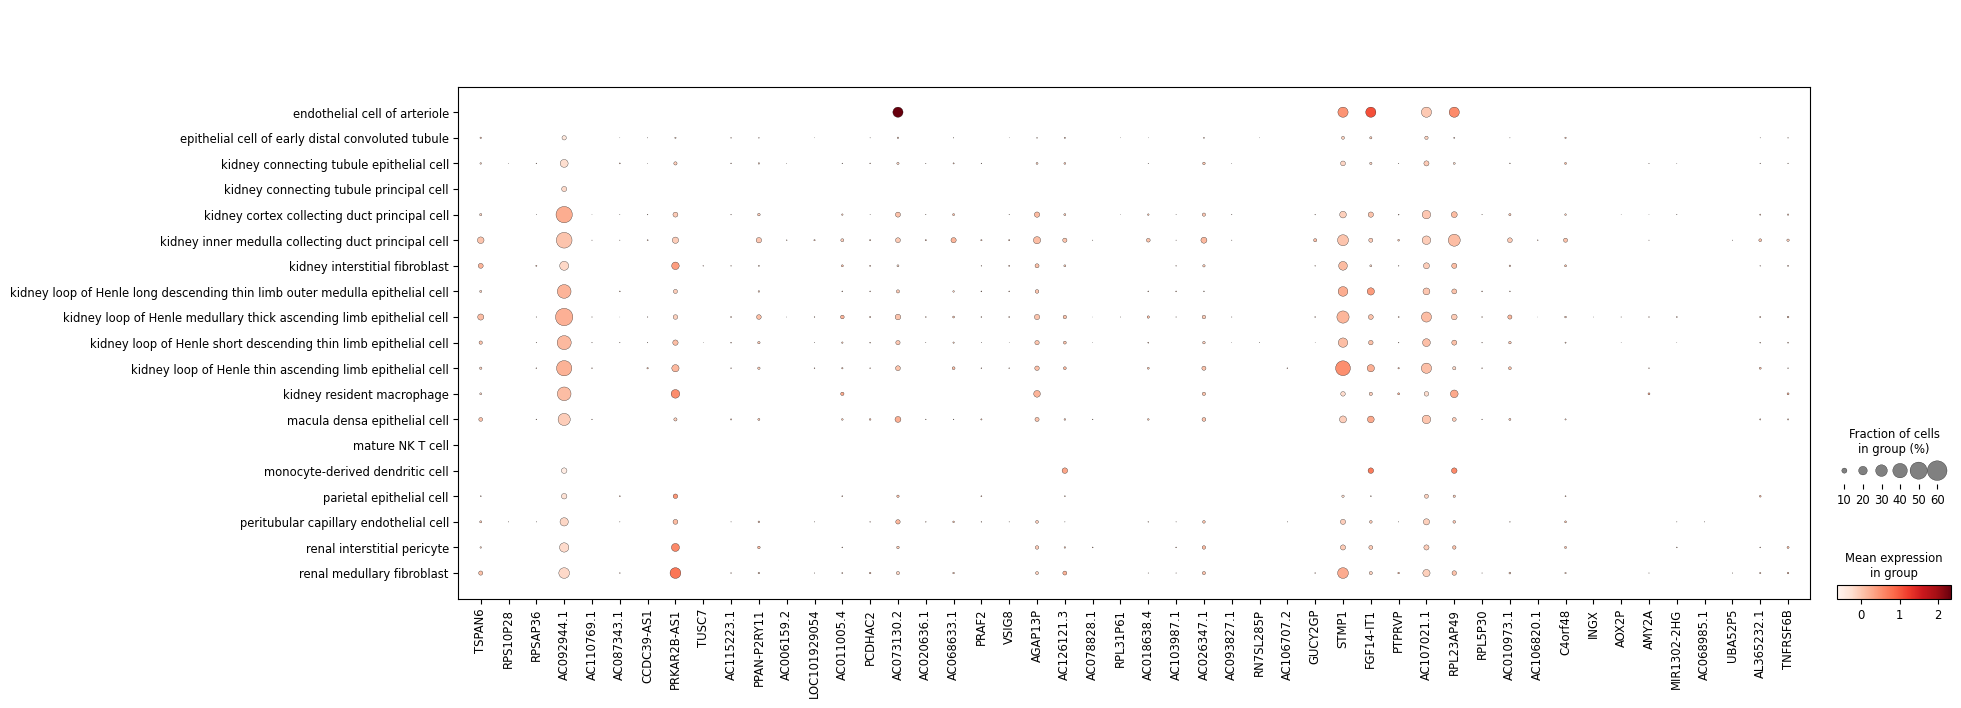

In [54]:
HBM964_BVWP_737_m_df_common = pd.merge(HBM964_BVWP_737_m_df, HBM964_BVWP_737_barcode_label_new, on = 'index', how = 'right')
HBM964_BVWP_737_m_df_common.set_index('index', inplace=True)
HBM964_BVWP_737_m_df_common = HBM964_BVWP_737_m_df_common.drop('predicted_label', axis = 1)


sc.experimental.pp.highly_variable_genes(HBM964_BVWP_737_m, flavor="pearson_residuals", n_top_genes= 50)
HBM964_BVWP_737_highly_var = HBM964_BVWP_737_m.var['highly_variable_rank'].reset_index().dropna()
HBM964_BVWP_737_hugo_symbols = HBM964_BVWP_737_m.var['hugo_symbol'].reset_index()                             
HBM964_BVWP_737_highly_var_hugo = pd.merge(HBM964_BVWP_737_highly_var, HBM964_BVWP_737_hugo_symbols, on = 'index', how = 'inner')
HBM964_BVWP_737_highly_var_rank = HBM964_BVWP_737_highly_var_hugo['highly_variable_rank']
HBM964_BVWP_737_highly_var_hugo.set_index('index', inplace=True)
HBM964_BVWP_737_highly_var_hugo = HBM964_BVWP_737_highly_var_hugo.drop('highly_variable_rank', axis = 1)
    

HBM964_BVWP_737_m_df_common = HBM964_BVWP_737_m_df_common.T


HBM964_BVWP_737_numeric = HBM964_BVWP_737_m_df_common.apply(pd.to_numeric)
HBM964_BVWP_737_numeric.reset_index(inplace=True)
HBM964_BVWP_737_numeric.set_index('index', inplace=True)
HBM964_BVWP_737_merged_adata_highly_var_for_cell = pd.merge(HBM964_BVWP_737_highly_var_hugo, HBM964_BVWP_737_numeric, on = "index", how = "right")
HBM964_BVWP_737_merged_adata_highly_var_for_cell = HBM964_BVWP_737_merged_adata_highly_var_for_cell.dropna()
HBM964_BVWP_737_hugo_genes = HBM964_BVWP_737_merged_adata_highly_var_for_cell['hugo_symbol'].dropna()
HBM964_BVWP_737_hugo_genes = HBM964_BVWP_737_hugo_genes.reset_index()

HBM964_BVWP_737_merged_adata_highly_var_for_cell = HBM964_BVWP_737_merged_adata_highly_var_for_cell.drop('hugo_symbol', axis = 1)


HBM964_BVWP_737_merged_ready_for_adata = HBM964_BVWP_737_merged_adata_highly_var_for_cell.T
HBM964_BVWP_737_adata_selected = ad.AnnData(HBM964_BVWP_737_merged_ready_for_adata)



HBM964_BVWP_737_adata_selected.var["hugo_symbol"] = pd.Categorical(HBM964_BVWP_737_hugo_genes['hugo_symbol'])
HBM964_BVWP_737_adata_selected.obs["predicted_label"] = pd.Categorical(HBM964_BVWP_737_barcode_label_new['predicted_label'])


sc.pl.dotplot(HBM964_BVWP_737_adata_selected, groupby = 'predicted_label', var_names = HBM964_BVWP_737_hugo_genes['hugo_symbol'], gene_symbols = 'hugo_symbol')

## Gene expression of selected genes

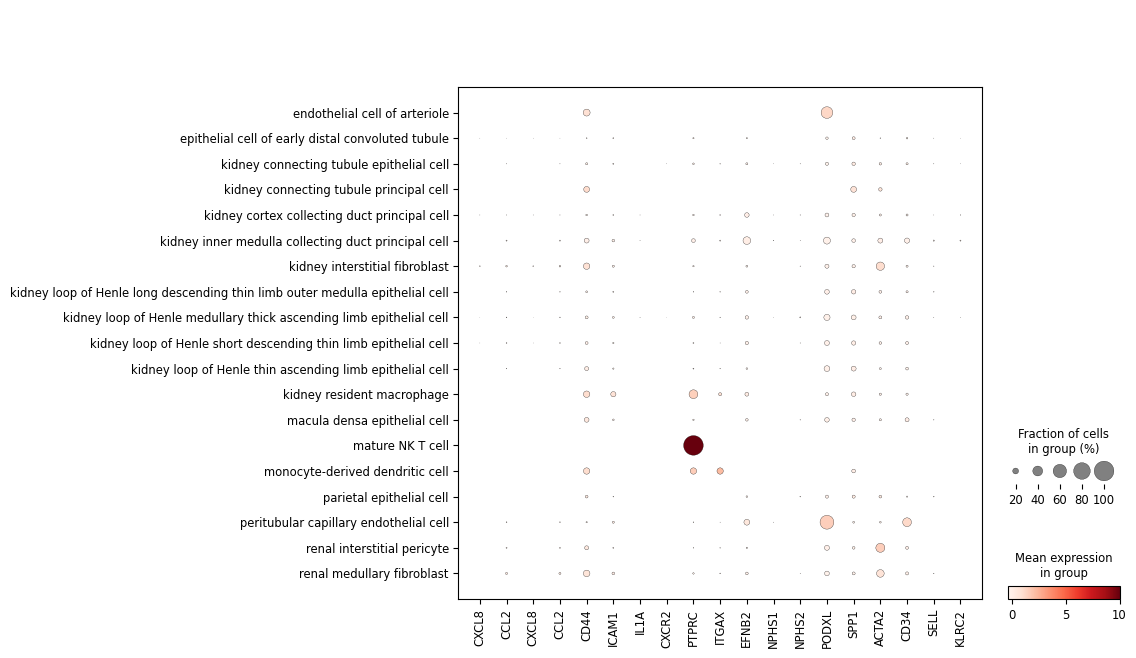

In [55]:
HBM964_BVWP_737_m_df2 = HBM964_BVWP_737_m.to_df()
HBM964_BVWP_737_m_df2 = HBM964_BVWP_737_m_df2.T.reset_index()
HBM964_BVWP_737_m_df2['index'] = HBM964_BVWP_737_m_df2['index'].apply(match_string)
HBM964_BVWP_737_m_df2.set_index('index', inplace=True)
HBM964_BVWP_737_m_adata = ad.AnnData(HBM964_BVWP_737_m_df2.T)
HBM964_BVWP_737_m_adata.obs['predicted_label'] = HBM964_BVWP_737_m.obs['predicted_label']


HBM964_BVWP_737_m_adata.var['hgnc_symbol'] = list(pd.merge(HBM964_BVWP_737_m_adata.var, annot, on = 'index', how = 'left')['hgnc_symbol'])

HBM964_BVWP_737_m_adata2 = HBM964_BVWP_737_m_adata.to_df()
HBM964_BVWP_737_m_adata2.reset_index(inplace=True)
HBM964_BVWP_737_m_adata2.set_index('index', inplace=True)
HBM964_BVWP_737_m_adata2['predicted_label'] = pd.Categorical(HBM964_BVWP_737_m_adata.obs['predicted_label'])
HBM964_BVWP_737_m_adata_barcode_label = HBM964_BVWP_737_m_adata2['predicted_label'].reset_index()
HBM964_BVWP_737_m_adata2 = HBM964_BVWP_737_m_adata2.drop('predicted_label', axis = 1)

HBM964_BVWP_737_m_adata_barcode_label_new = pd.merge(HBM964_BVWP_737_m_adata_barcode_label, fifth, on = 'predicted_label', how = 'right')
HBM964_BVWP_737_m_adata2_common = pd.merge(HBM964_BVWP_737_m_adata2, HBM964_BVWP_737_m_adata_barcode_label_new, on = 'index', how = 'right')
HBM964_BVWP_737_m_adata2_common.set_index('index', inplace=True)
HBM964_BVWP_737_m_adata2_common = HBM964_BVWP_737_m_adata2_common.drop('predicted_label', axis = 1)
HBM964_BVWP_737_m_adata2_numeric = HBM964_BVWP_737_m_adata2_common.apply(pd.to_numeric)
HBM964_BVWP_737_m_adata2_selected = ad.AnnData(HBM964_BVWP_737_m_adata2_numeric)
HBM964_BVWP_737_m_adata2_selected.var["hgnc_symbol"] = pd.Categorical(HBM964_BVWP_737_m_adata.var['hgnc_symbol'])
HBM964_BVWP_737_m_adata2_selected.obs["predicted_label"] = pd.Categorical(HBM964_BVWP_737_m_adata_barcode_label_new['predicted_label'])


gene_list = []

all_selected_genes = ['CXCL8', 'CCL2', 'CXCL8', 'CCL2', 'CD44', 'ICAM1', 'IL1A', 'CXCR2', 'PTPRC', 'ITGAX', 'CSF3', "EFNB2", "NPHS1", "NPHS2", "PODXL", "TPSB2" "C7", "SPP1", "ACTA2", "CD34", "SELL", "KLRC2"]

for i in all_selected_genes:
    if i in list(HBM964_BVWP_737_m_adata.var['hgnc_symbol'].dropna()):
        gene_list.append(i)

sc.pl.dotplot(HBM964_BVWP_737_m_adata2_selected, groupby = 'predicted_label', var_names = gene_list, gene_symbols = 'hgnc_symbol')

## Top highly variable genes, HGNC annotations from Ensembl

/opt/anaconda3/lib/python3.12/site-packages/scanpy/experimental/pp/_highly_variable_genes.py:153: UserWarning: `flavor='pearson_residuals'` expects raw count data, but non-integers were found.
  warnings.warn(


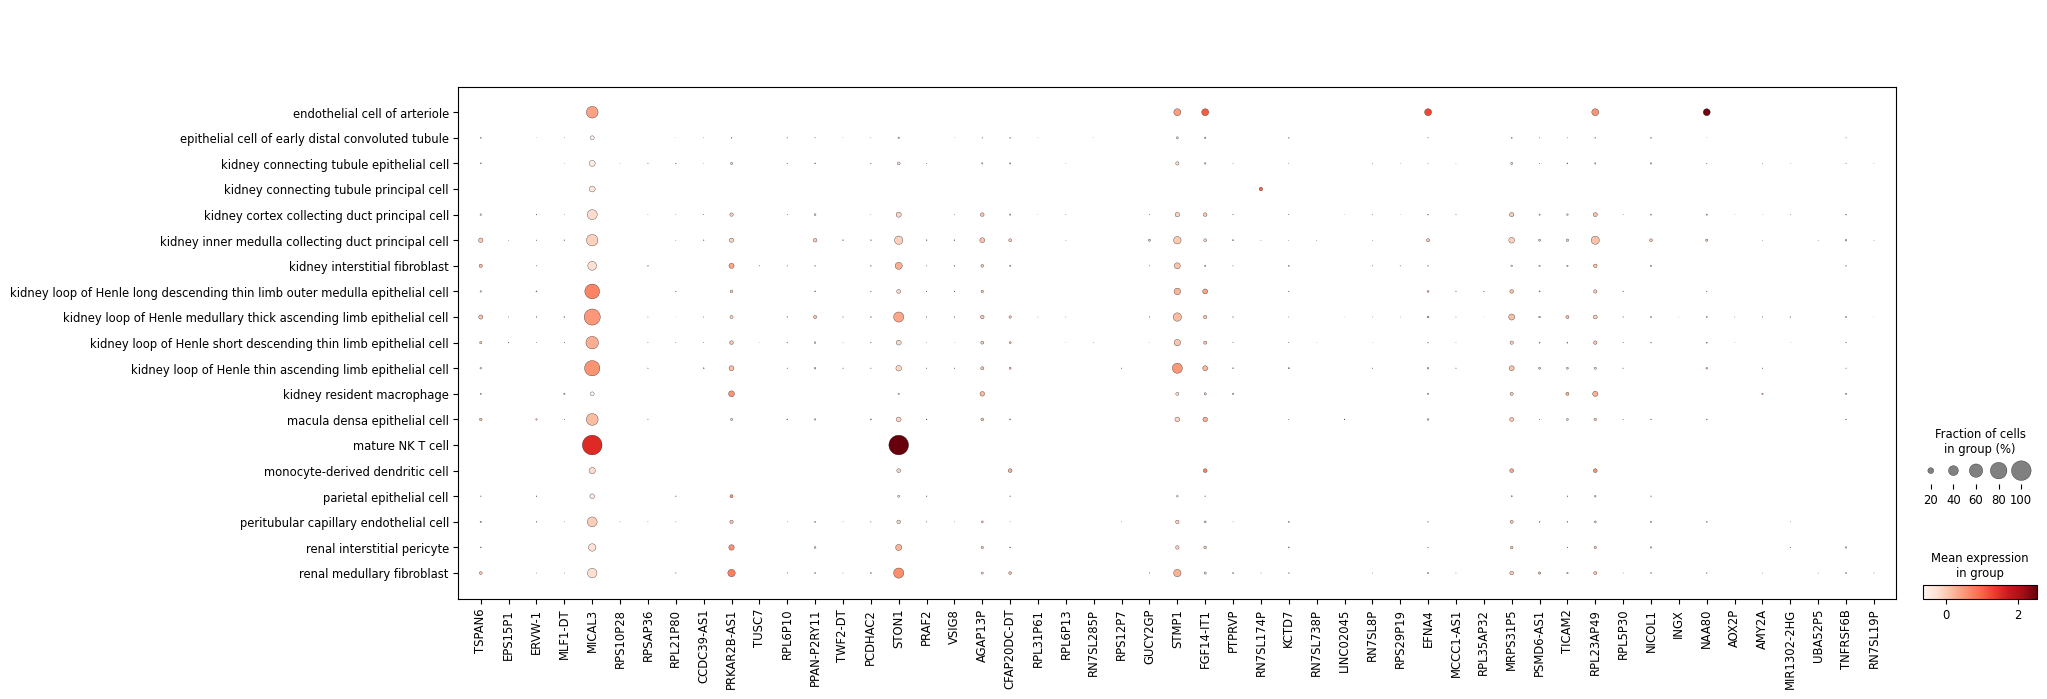

In [56]:
HBM964_BVWP_737_m_df_dotplot3 = HBM964_BVWP_737_m.to_df()
HBM964_BVWP_737_m_df_dotplot3 = HBM964_BVWP_737_m_df_dotplot3.T.reset_index()
HBM964_BVWP_737_m_df_dotplot3['index'] = HBM964_BVWP_737_m_df_dotplot3['index'].apply(match_string)
HBM964_BVWP_737_m_df_dotplot3.set_index('index', inplace=True)
HBM964_BVWP_737_m_adata3 = ad.AnnData(HBM964_BVWP_737_m_df_dotplot3.T)
HBM964_BVWP_737_m_adata3.obs['predicted_label'] = HBM964_BVWP_737_m.obs['predicted_label']
HBM964_BVWP_737_m_adata3.var['hgnc_symbol'] = list(pd.merge(HBM964_BVWP_737_m_adata3.var, annot, on = 'index', how = 'left')['hgnc_symbol'])


HBM964_BVWP_737_m_df_adata3 = HBM964_BVWP_737_m_adata3.to_df()
HBM964_BVWP_737_m_df_adata3.reset_index(inplace=True)
HBM964_BVWP_737_m_df_adata3.set_index('index', inplace=True)
HBM964_BVWP_737_m_df_adata3['predicted_label'] = list(HBM964_BVWP_737_m_adata3.obs['predicted_label'])
HBM964_BVWP_737_barcode_label_adata3 = HBM964_BVWP_737_m_df_adata3['predicted_label'].reset_index()
HBM964_BVWP_737_m_df_adata3 = HBM964_BVWP_737_m_df_adata3.drop('predicted_label', axis = 1)


HBM964_BVWP_737_m_adata3_barcode_label_new = pd.merge(HBM964_BVWP_737_barcode_label_adata3, fifth, on = 'predicted_label', how = 'right')
HBM964_BVWP_737_m_adata3_common = pd.merge(HBM964_BVWP_737_m_df_adata3, HBM964_BVWP_737_m_adata3_barcode_label_new, on = 'index', how = 'right')
HBM964_BVWP_737_m_adata3_common.set_index('index', inplace=True)
HBM964_BVWP_737_m_adata3_common = HBM964_BVWP_737_m_adata3_common.drop('predicted_label', axis = 1)


sc.experimental.pp.highly_variable_genes(HBM964_BVWP_737_m_adata3, flavor="pearson_residuals", n_top_genes= 70)
HBM964_BVWP_737_highly_var3 = HBM964_BVWP_737_m_adata3.var['highly_variable_rank'].reset_index().dropna()
HBM964_BVWP_737_hugo_symbols3 = HBM964_BVWP_737_m_adata3.var['hgnc_symbol'].reset_index()                             
HBM964_BVWP_737_highly_var_hugo3 = pd.merge(HBM964_BVWP_737_highly_var3, HBM964_BVWP_737_hugo_symbols3, on = 'index', how = 'inner')
HBM964_BVWP_737_highly_var_rank3 = HBM964_BVWP_737_highly_var_hugo3['highly_variable_rank']
HBM964_BVWP_737_highly_var_hugo3.set_index('index', inplace=True)
HBM964_BVWP_737_highly_var_hugo3 = HBM964_BVWP_737_highly_var_hugo3.drop('highly_variable_rank', axis = 1)


HBM964_BVWP_737_m_adata3_common = HBM964_BVWP_737_m_adata3_common.T


HBM964_BVWP_737_numeric3 = HBM964_BVWP_737_m_adata3_common.apply(pd.to_numeric)
HBM964_BVWP_737_numeric3.reset_index(inplace=True)
HBM964_BVWP_737_numeric3.set_index('index', inplace=True)
HBM964_BVWP_737_merged_adata_highly_var_for_cell3 = pd.merge(HBM964_BVWP_737_highly_var_hugo3, HBM964_BVWP_737_numeric3, on = "index", how = "right")
HBM964_BVWP_737_merged_adata_highly_var_for_cell3 = HBM964_BVWP_737_merged_adata_highly_var_for_cell3.dropna()
HBM964_BVWP_737_hugo_genes3 = HBM964_BVWP_737_merged_adata_highly_var_for_cell3['hgnc_symbol'].dropna()
HBM964_BVWP_737_hugo_genes3 = HBM964_BVWP_737_hugo_genes3.reset_index()

HBM964_BVWP_737_merged_adata_highly_var_for_cell3 = HBM964_BVWP_737_merged_adata_highly_var_for_cell3.drop('hgnc_symbol', axis = 1)


HBM964_BVWP_737_merged_ready_for_adata3 = HBM964_BVWP_737_merged_adata_highly_var_for_cell3.T
HBM964_BVWP_737_adata_selected3 = ad.AnnData(HBM964_BVWP_737_merged_ready_for_adata3)



HBM964_BVWP_737_adata_selected3.var["hgnc_symbol"] = pd.Categorical(HBM964_BVWP_737_hugo_genes3['hgnc_symbol'])
HBM964_BVWP_737_adata_selected3.obs["predicted_label"] = pd.Categorical(HBM964_BVWP_737_m_adata3_barcode_label_new['predicted_label'])


sc.pl.dotplot(HBM964_BVWP_737_adata_selected3, groupby = 'predicted_label', var_names = HBM964_BVWP_737_hugo_genes3['hgnc_symbol'], gene_symbols = 'hgnc_symbol')

# HBM648_DKQK_874

## Top highly variable genes, original

/opt/anaconda3/lib/python3.12/site-packages/scanpy/experimental/pp/_highly_variable_genes.py:153: UserWarning: `flavor='pearson_residuals'` expects raw count data, but non-integers were found.
  warnings.warn(


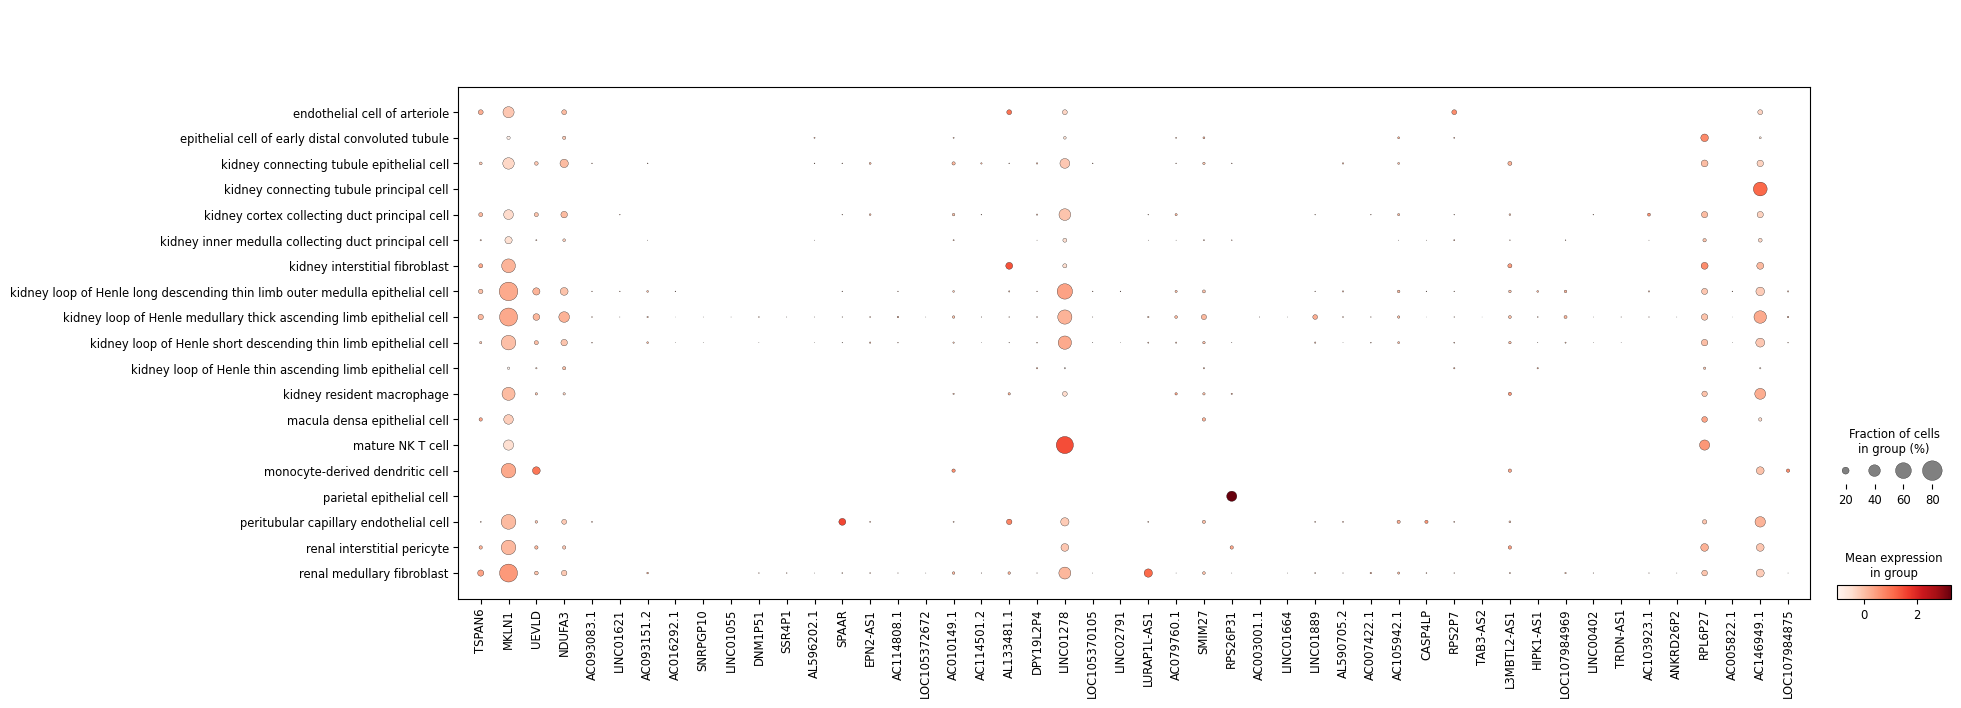

In [57]:
HBM648_DKQK_874_f_df_common = pd.merge(HBM648_DKQK_874_f_df, HBM648_DKQK_874_barcode_label_new, on = 'index', how = 'right')
HBM648_DKQK_874_f_df_common.set_index('index', inplace=True)
HBM648_DKQK_874_f_df_common = HBM648_DKQK_874_f_df_common.drop('predicted_label', axis = 1)



sc.experimental.pp.highly_variable_genes(HBM648_DKQK_874_f, flavor="pearson_residuals", n_top_genes= 50)
HBM648_DKQK_874_highly_var = HBM648_DKQK_874_f.var['highly_variable_rank'].reset_index().dropna()
HBM648_DKQK_874_hugo_symbols = HBM648_DKQK_874_f.var['hugo_symbol'].reset_index()                             
HBM648_DKQK_874_highly_var_hugo = pd.merge(HBM648_DKQK_874_highly_var, HBM648_DKQK_874_hugo_symbols, on = 'index', how = 'inner')
HBM648_DKQK_874_highly_var_rank = HBM648_DKQK_874_highly_var_hugo['highly_variable_rank']
HBM648_DKQK_874_highly_var_hugo.set_index('index', inplace=True)
HBM648_DKQK_874_highly_var_hugo = HBM648_DKQK_874_highly_var_hugo.drop('highly_variable_rank', axis = 1)
    

HBM648_DKQK_874_f_df_common = HBM648_DKQK_874_f_df_common.T


HBM648_DKQK_874_numeric = HBM648_DKQK_874_f_df_common.apply(pd.to_numeric)
HBM648_DKQK_874_numeric.reset_index(inplace=True)
HBM648_DKQK_874_numeric.set_index('index', inplace=True)
HBM648_DKQK_874_merged_adata_highly_var_for_cell = pd.merge(HBM648_DKQK_874_highly_var_hugo, HBM648_DKQK_874_numeric, on = "index", how = "right")
HBM648_DKQK_874_merged_adata_highly_var_for_cell = HBM648_DKQK_874_merged_adata_highly_var_for_cell.dropna()
HBM648_DKQK_874_hugo_genes = HBM648_DKQK_874_merged_adata_highly_var_for_cell['hugo_symbol'].dropna()
HBM648_DKQK_874_hugo_genes = HBM648_DKQK_874_hugo_genes.reset_index()

HBM648_DKQK_874_merged_adata_highly_var_for_cell = HBM648_DKQK_874_merged_adata_highly_var_for_cell.drop('hugo_symbol', axis = 1)


HBM648_DKQK_874_merged_ready_for_adata = HBM648_DKQK_874_merged_adata_highly_var_for_cell.T
HBM648_DKQK_874_adata_selected = ad.AnnData(HBM648_DKQK_874_merged_ready_for_adata)



HBM648_DKQK_874_adata_selected.var["hugo_symbol"] = pd.Categorical(HBM648_DKQK_874_hugo_genes['hugo_symbol'])
HBM648_DKQK_874_adata_selected.obs["predicted_label"] = pd.Categorical(HBM648_DKQK_874_barcode_label_new['predicted_label'])


sc.pl.dotplot(HBM648_DKQK_874_adata_selected, groupby = 'predicted_label', var_names = HBM648_DKQK_874_hugo_genes['hugo_symbol'], gene_symbols = 'hugo_symbol')

## Gene expression of selected genes

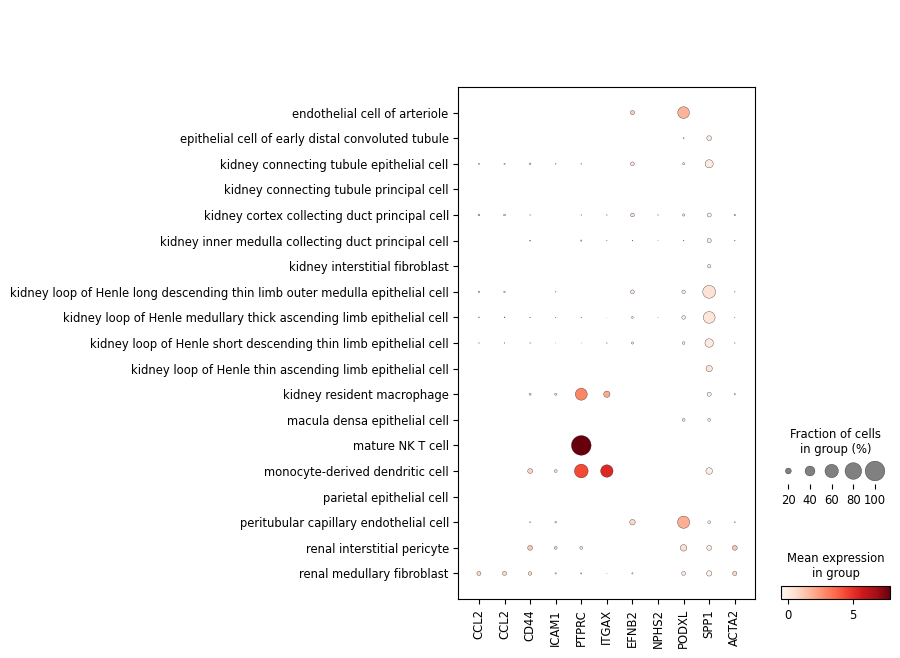

In [58]:
HBM648_DKQK_874_f_df2 = HBM648_DKQK_874_f.to_df()
HBM648_DKQK_874_f_df2 = HBM648_DKQK_874_f_df2.T.reset_index()
HBM648_DKQK_874_f_df2['index'] = HBM648_DKQK_874_f_df2['index'].apply(match_string)
HBM648_DKQK_874_f_df2.set_index('index', inplace=True)
HBM648_DKQK_874_f_adata = ad.AnnData(HBM648_DKQK_874_f_df2.T)
HBM648_DKQK_874_f_adata.obs['predicted_label'] = HBM648_DKQK_874_f.obs['predicted_label']


HBM648_DKQK_874_f_adata.var['hgnc_symbol'] = list(pd.merge(HBM648_DKQK_874_f_adata.var, annot, on = 'index', how = 'left')['hgnc_symbol'])

HBM648_DKQK_874_f_adata2 = HBM648_DKQK_874_f_adata.to_df()
HBM648_DKQK_874_f_adata2.reset_index(inplace=True)
HBM648_DKQK_874_f_adata2.set_index('index', inplace=True)
HBM648_DKQK_874_f_adata2['predicted_label'] = pd.Categorical(HBM648_DKQK_874_f_adata.obs['predicted_label'])
HBM648_DKQK_874_f_adata_barcode_label = HBM648_DKQK_874_f_adata2['predicted_label'].reset_index()
HBM648_DKQK_874_f_adata2 = HBM648_DKQK_874_f_adata2.drop('predicted_label', axis = 1)

HBM648_DKQK_874_f_adata_barcode_label_new = pd.merge(HBM648_DKQK_874_f_adata_barcode_label, fifth, on = 'predicted_label', how = 'right')
HBM648_DKQK_874_f_adata2_common = pd.merge(HBM648_DKQK_874_f_adata2, HBM648_DKQK_874_f_adata_barcode_label_new, on = 'index', how = 'right')
HBM648_DKQK_874_f_adata2_common.set_index('index', inplace=True)
HBM648_DKQK_874_f_adata2_common = HBM648_DKQK_874_f_adata2_common.drop('predicted_label', axis = 1)
HBM648_DKQK_874_f_adata2_numeric = HBM648_DKQK_874_f_adata2_common.apply(pd.to_numeric)
HBM648_DKQK_874_f_adata2_selected = ad.AnnData(HBM648_DKQK_874_f_adata2_numeric)
HBM648_DKQK_874_f_adata2_selected.var["hgnc_symbol"] = pd.Categorical(HBM648_DKQK_874_f_adata.var['hgnc_symbol'])
HBM648_DKQK_874_f_adata2_selected.obs["predicted_label"] = pd.Categorical(HBM648_DKQK_874_f_adata_barcode_label_new['predicted_label'])


gene_list = []

all_selected_genes = ['CXCL8', 'CCL2', 'CXCL8', 'CCL2', 'CD44', 'ICAM1', 'IL1A', 'CXCR2', 'PTPRC', 'ITGAX', 'CSF3', "EFNB2", "NPHS1", "NPHS2", "PODXL", "TPSB2" "C7", "SPP1", "ACTA2"]

for i in all_selected_genes:
    if i in list(HBM648_DKQK_874_f_adata.var['hgnc_symbol'].dropna()):
        gene_list.append(i)

sc.pl.dotplot(HBM648_DKQK_874_f_adata2_selected, groupby = 'predicted_label', var_names = gene_list, gene_symbols = 'hgnc_symbol')

## Top highly variable genes, HGNC annotations from Ensembl

/opt/anaconda3/lib/python3.12/site-packages/scanpy/experimental/pp/_highly_variable_genes.py:153: UserWarning: `flavor='pearson_residuals'` expects raw count data, but non-integers were found.
  warnings.warn(


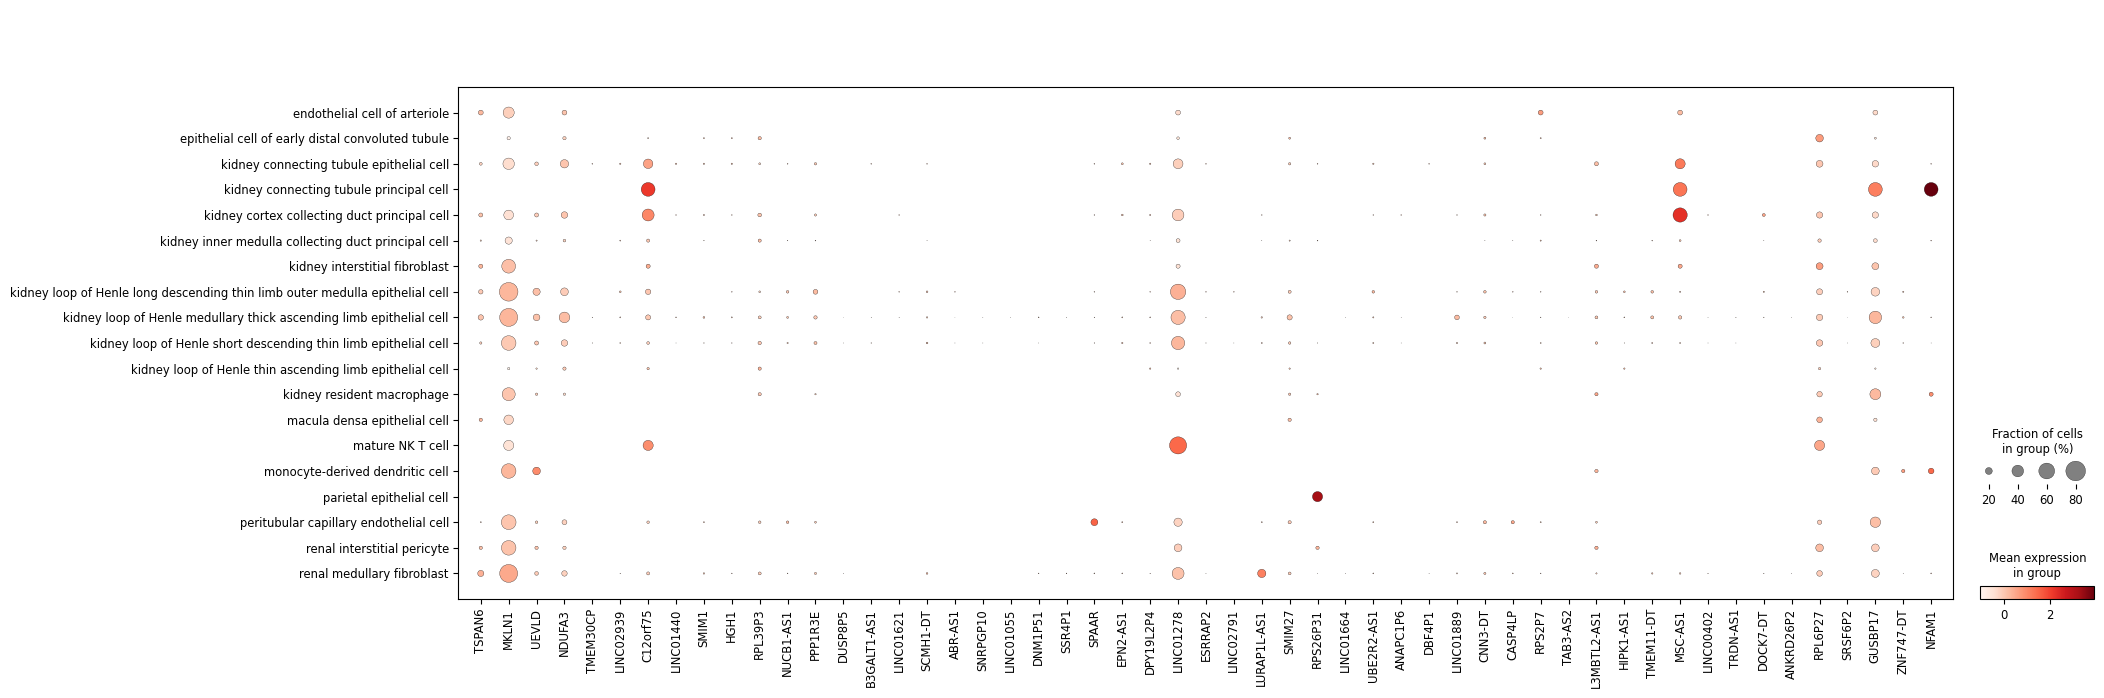

In [59]:
HBM648_DKQK_874_f_df_dotplot3 = HBM648_DKQK_874_f.to_df()
HBM648_DKQK_874_f_df_dotplot3 = HBM648_DKQK_874_f_df_dotplot3.T.reset_index()
HBM648_DKQK_874_f_df_dotplot3['index'] = HBM648_DKQK_874_f_df_dotplot3['index'].apply(match_string)
HBM648_DKQK_874_f_df_dotplot3.set_index('index', inplace=True)
HBM648_DKQK_874_f_adata3 = ad.AnnData(HBM648_DKQK_874_f_df_dotplot3.T)
HBM648_DKQK_874_f_adata3.obs['predicted_label'] = HBM648_DKQK_874_f.obs['predicted_label']
HBM648_DKQK_874_f_adata3.var['hgnc_symbol'] = list(pd.merge(HBM648_DKQK_874_f_adata3.var, annot, on = 'index', how = 'left')['hgnc_symbol'])


HBM648_DKQK_874_f_df_adata3 = HBM648_DKQK_874_f_adata3.to_df()
HBM648_DKQK_874_f_df_adata3.reset_index(inplace=True)
HBM648_DKQK_874_f_df_adata3.set_index('index', inplace=True)
HBM648_DKQK_874_f_df_adata3['predicted_label'] = list(HBM648_DKQK_874_f_adata3.obs['predicted_label'])
HBM648_DKQK_874_barcode_label_adata3 = HBM648_DKQK_874_f_df_adata3['predicted_label'].reset_index()
HBM648_DKQK_874_f_df_adata3 = HBM648_DKQK_874_f_df_adata3.drop('predicted_label', axis = 1)


HBM648_DKQK_874_f_adata3_barcode_label_new = pd.merge(HBM648_DKQK_874_barcode_label_adata3, fifth, on = 'predicted_label', how = 'right')
HBM648_DKQK_874_f_adata3_common = pd.merge(HBM648_DKQK_874_f_df_adata3, HBM648_DKQK_874_f_adata3_barcode_label_new, on = 'index', how = 'right')
HBM648_DKQK_874_f_adata3_common.set_index('index', inplace=True)
HBM648_DKQK_874_f_adata3_common = HBM648_DKQK_874_f_adata3_common.drop('predicted_label', axis = 1)


sc.experimental.pp.highly_variable_genes(HBM648_DKQK_874_f_adata3, flavor="pearson_residuals", n_top_genes= 70)
HBM648_DKQK_874_highly_var3 = HBM648_DKQK_874_f_adata3.var['highly_variable_rank'].reset_index().dropna()
HBM648_DKQK_874_hugo_symbols3 = HBM648_DKQK_874_f_adata3.var['hgnc_symbol'].reset_index()                             
HBM648_DKQK_874_highly_var_hugo3 = pd.merge(HBM648_DKQK_874_highly_var3, HBM648_DKQK_874_hugo_symbols3, on = 'index', how = 'inner')
HBM648_DKQK_874_highly_var_rank3 = HBM648_DKQK_874_highly_var_hugo3['highly_variable_rank']
HBM648_DKQK_874_highly_var_hugo3.set_index('index', inplace=True)
HBM648_DKQK_874_highly_var_hugo3 = HBM648_DKQK_874_highly_var_hugo3.drop('highly_variable_rank', axis = 1)


HBM648_DKQK_874_f_adata3_common = HBM648_DKQK_874_f_adata3_common.T


HBM648_DKQK_874_numeric3 = HBM648_DKQK_874_f_adata3_common.apply(pd.to_numeric)
HBM648_DKQK_874_numeric3.reset_index(inplace=True)
HBM648_DKQK_874_numeric3.set_index('index', inplace=True)
HBM648_DKQK_874_merged_adata_highly_var_for_cell3 = pd.merge(HBM648_DKQK_874_highly_var_hugo3, HBM648_DKQK_874_numeric3, on = "index", how = "right")
HBM648_DKQK_874_merged_adata_highly_var_for_cell3 = HBM648_DKQK_874_merged_adata_highly_var_for_cell3.dropna()
HBM648_DKQK_874_hugo_genes3 = HBM648_DKQK_874_merged_adata_highly_var_for_cell3['hgnc_symbol'].dropna()
HBM648_DKQK_874_hugo_genes3 = HBM648_DKQK_874_hugo_genes3.reset_index()

HBM648_DKQK_874_merged_adata_highly_var_for_cell3 = HBM648_DKQK_874_merged_adata_highly_var_for_cell3.drop('hgnc_symbol', axis = 1)


HBM648_DKQK_874_merged_ready_for_adata3 = HBM648_DKQK_874_merged_adata_highly_var_for_cell3.T
HBM648_DKQK_874_adata_selected3 = ad.AnnData(HBM648_DKQK_874_merged_ready_for_adata3)



HBM648_DKQK_874_adata_selected3.var["hgnc_symbol"] = pd.Categorical(HBM648_DKQK_874_hugo_genes3['hgnc_symbol'])
HBM648_DKQK_874_adata_selected3.obs["predicted_label"] = pd.Categorical(HBM648_DKQK_874_f_adata3_barcode_label_new['predicted_label'])


sc.pl.dotplot(HBM648_DKQK_874_adata_selected3, groupby = 'predicted_label', var_names = HBM648_DKQK_874_hugo_genes3['hgnc_symbol'], gene_symbols = 'hgnc_symbol')

# HBM628_QKGB_497

## Top highly variable genes, original

/opt/anaconda3/lib/python3.12/site-packages/scanpy/experimental/pp/_highly_variable_genes.py:153: UserWarning: `flavor='pearson_residuals'` expects raw count data, but non-integers were found.
  warnings.warn(


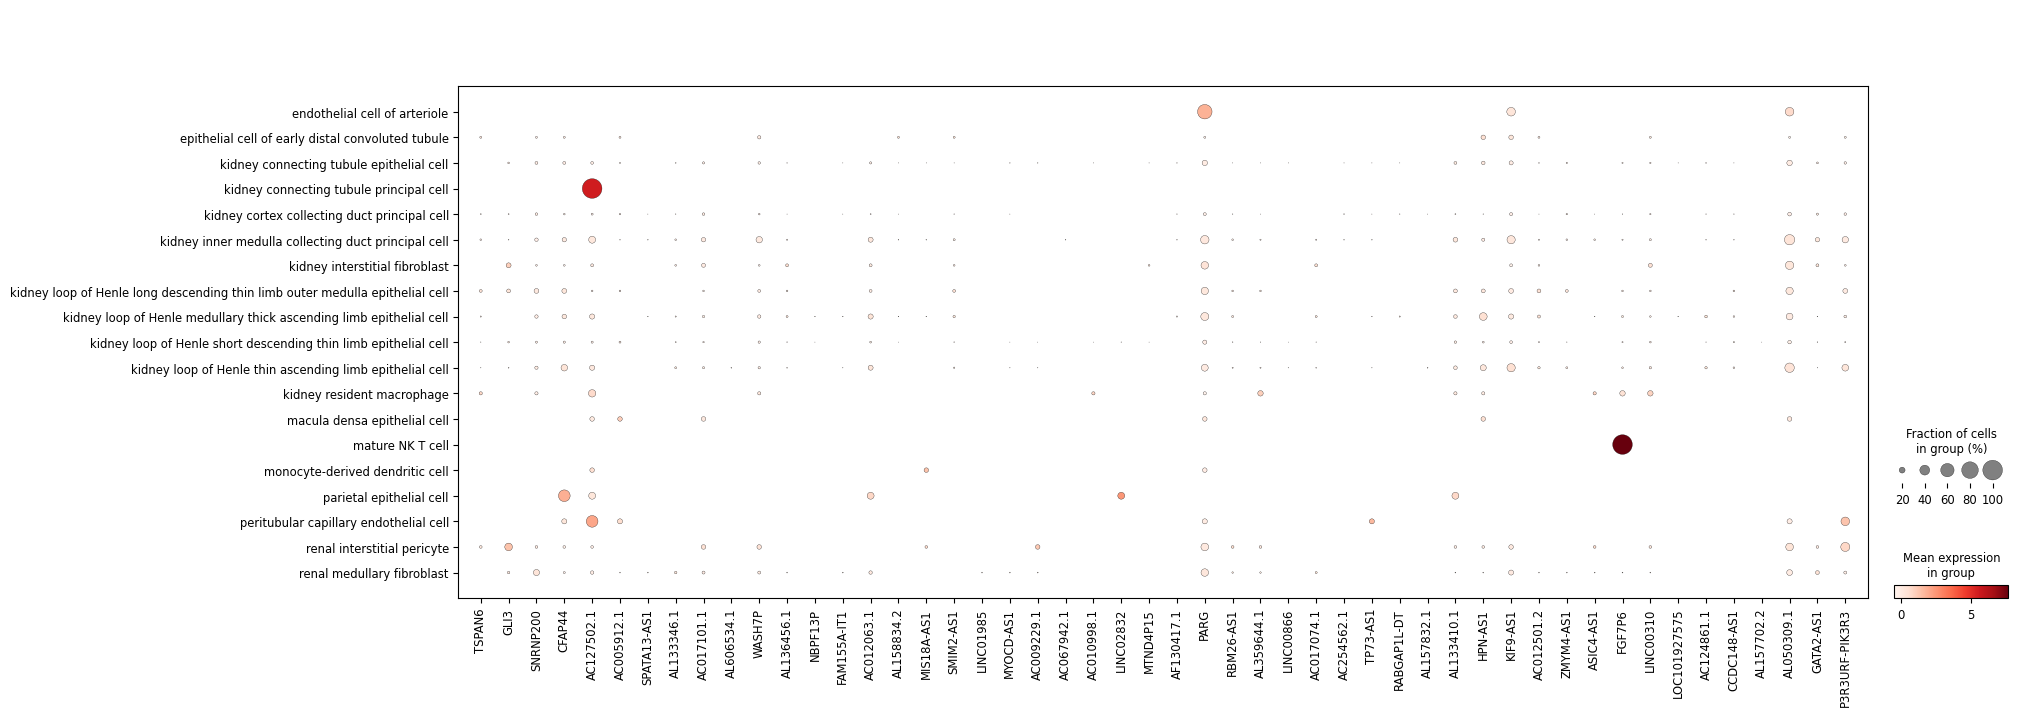

In [60]:
HBM628_QKGB_497_m_df_common = pd.merge(HBM628_QKGB_497_m_df, HBM628_QKGB_497_barcode_label_new, on = 'index', how = 'right')
HBM628_QKGB_497_m_df_common.set_index('index', inplace=True)
HBM628_QKGB_497_m_df_common = HBM628_QKGB_497_m_df_common.drop('predicted_label', axis = 1)


sc.experimental.pp.highly_variable_genes(HBM628_QKGB_497_m, flavor="pearson_residuals", n_top_genes= 50)
HBM628_QKGB_497_highly_var = HBM628_QKGB_497_m.var['highly_variable_rank'].reset_index().dropna()
HBM628_QKGB_497_hugo_symbols = HBM628_QKGB_497_m.var['hugo_symbol'].reset_index()                             
HBM628_QKGB_497_highly_var_hugo = pd.merge(HBM628_QKGB_497_highly_var, HBM628_QKGB_497_hugo_symbols, on = 'index', how = 'inner')
HBM628_QKGB_497_highly_var_rank = HBM628_QKGB_497_highly_var_hugo['highly_variable_rank']
HBM628_QKGB_497_highly_var_hugo.set_index('index', inplace=True)
HBM628_QKGB_497_highly_var_hugo = HBM628_QKGB_497_highly_var_hugo.drop('highly_variable_rank', axis = 1)
    

HBM628_QKGB_497_m_df_common = HBM628_QKGB_497_m_df_common.T


HBM628_QKGB_497_numeric = HBM628_QKGB_497_m_df_common.apply(pd.to_numeric)
HBM628_QKGB_497_numeric.reset_index(inplace=True)
HBM628_QKGB_497_numeric.set_index('index', inplace=True)
HBM628_QKGB_497_merged_adata_highly_var_for_cell = pd.merge(HBM628_QKGB_497_highly_var_hugo, HBM628_QKGB_497_numeric, on = "index", how = "right")
HBM628_QKGB_497_merged_adata_highly_var_for_cell = HBM628_QKGB_497_merged_adata_highly_var_for_cell.dropna()
HBM628_QKGB_497_hugo_genes = HBM628_QKGB_497_merged_adata_highly_var_for_cell['hugo_symbol'].dropna()
HBM628_QKGB_497_hugo_genes = HBM628_QKGB_497_hugo_genes.reset_index()

HBM628_QKGB_497_merged_adata_highly_var_for_cell = HBM628_QKGB_497_merged_adata_highly_var_for_cell.drop('hugo_symbol', axis = 1)


HBM628_QKGB_497_merged_ready_for_adata = HBM628_QKGB_497_merged_adata_highly_var_for_cell.T
HBM628_QKGB_497_adata_selected = ad.AnnData(HBM628_QKGB_497_merged_ready_for_adata)



HBM628_QKGB_497_adata_selected.var["hugo_symbol"] = pd.Categorical(HBM628_QKGB_497_hugo_genes['hugo_symbol'])
HBM628_QKGB_497_adata_selected.obs["predicted_label"] = pd.Categorical(HBM628_QKGB_497_barcode_label_new['predicted_label'])


sc.pl.dotplot(HBM628_QKGB_497_adata_selected, groupby = 'predicted_label', var_names = HBM628_QKGB_497_hugo_genes['hugo_symbol'], gene_symbols = 'hugo_symbol')

## Gene expression of selected genes

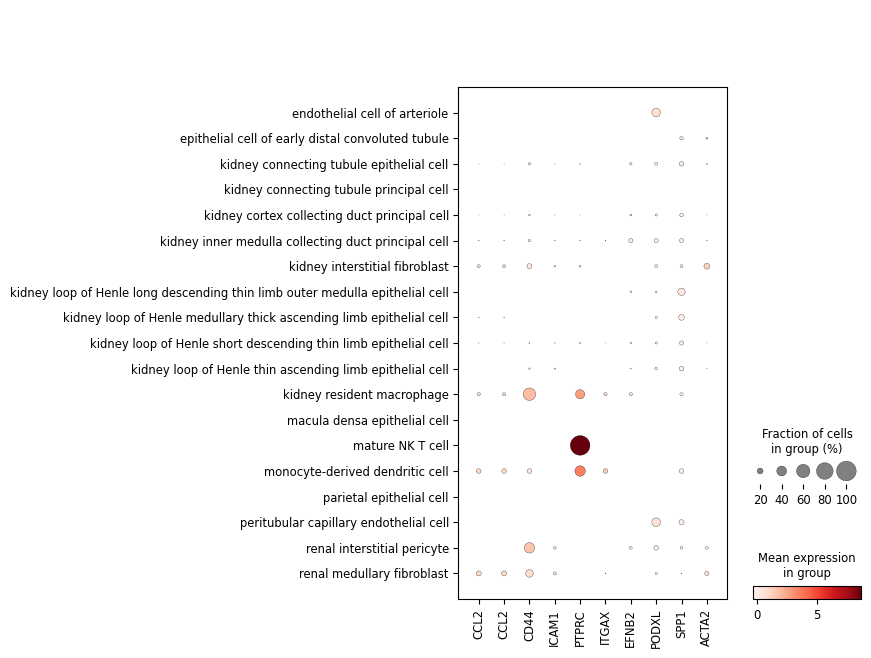

In [61]:
HBM628_QKGB_497_m_df2 = HBM628_QKGB_497_m.to_df()
HBM628_QKGB_497_m_df2 = HBM628_QKGB_497_m_df2.T.reset_index()
HBM628_QKGB_497_m_df2['index'] = HBM628_QKGB_497_m_df2['index'].apply(match_string)
HBM628_QKGB_497_m_df2.set_index('index', inplace=True)
HBM628_QKGB_497_m_adata = ad.AnnData(HBM628_QKGB_497_m_df2.T)
HBM628_QKGB_497_m_adata.obs['predicted_label'] = HBM628_QKGB_497_m.obs['predicted_label']


HBM628_QKGB_497_m_adata.var['hgnc_symbol'] = list(pd.merge(HBM628_QKGB_497_m_adata.var, annot, on = 'index', how = 'left')['hgnc_symbol'])

HBM628_QKGB_497_m_adata2 = HBM628_QKGB_497_m_adata.to_df()
HBM628_QKGB_497_m_adata2.reset_index(inplace=True)
HBM628_QKGB_497_m_adata2.set_index('index', inplace=True)
HBM628_QKGB_497_m_adata2['predicted_label'] = pd.Categorical(HBM628_QKGB_497_m_adata.obs['predicted_label'])
HBM628_QKGB_497_m_adata_barcode_label = HBM628_QKGB_497_m_adata2['predicted_label'].reset_index()
HBM628_QKGB_497_m_adata2 = HBM628_QKGB_497_m_adata2.drop('predicted_label', axis = 1)

HBM628_QKGB_497_m_adata_barcode_label_new = pd.merge(HBM628_QKGB_497_m_adata_barcode_label, fifth, on = 'predicted_label', how = 'right')
HBM628_QKGB_497_m_adata2_common = pd.merge(HBM628_QKGB_497_m_adata2, HBM628_QKGB_497_m_adata_barcode_label_new, on = 'index', how = 'right')
HBM628_QKGB_497_m_adata2_common.set_index('index', inplace=True)
HBM628_QKGB_497_m_adata2_common = HBM628_QKGB_497_m_adata2_common.drop('predicted_label', axis = 1)
HBM628_QKGB_497_m_adata2_numeric = HBM628_QKGB_497_m_adata2_common.apply(pd.to_numeric)
HBM628_QKGB_497_m_adata2_selected = ad.AnnData(HBM628_QKGB_497_m_adata2_numeric)
HBM628_QKGB_497_m_adata2_selected.var["hgnc_symbol"] = pd.Categorical(HBM628_QKGB_497_m_adata.var['hgnc_symbol'])
HBM628_QKGB_497_m_adata2_selected.obs["predicted_label"] = pd.Categorical(HBM628_QKGB_497_m_adata_barcode_label_new['predicted_label'])


gene_list = []

all_selected_genes = ['CXCL8', 'CCL2', 'CXCL8', 'CCL2', 'CD44', 'ICAM1', 'IL1A', 'CXCR2', 'PTPRC', 'ITGAX', 'CSF3', "EFNB2", "NPHS1", "NPHS2", "PODXL", "TPSB2" "C7", "SPP1", "ACTA2"]

for i in all_selected_genes:
    if i in list(HBM628_QKGB_497_m_adata.var['hgnc_symbol'].dropna()):
        gene_list.append(i)

sc.pl.dotplot(HBM628_QKGB_497_m_adata2_selected, groupby = 'predicted_label', var_names = gene_list, gene_symbols = 'hgnc_symbol')

## Top highly variable genes, HGNC annotations from Ensembl

/opt/anaconda3/lib/python3.12/site-packages/scanpy/experimental/pp/_highly_variable_genes.py:153: UserWarning: `flavor='pearson_residuals'` expects raw count data, but non-integers were found.
  warnings.warn(


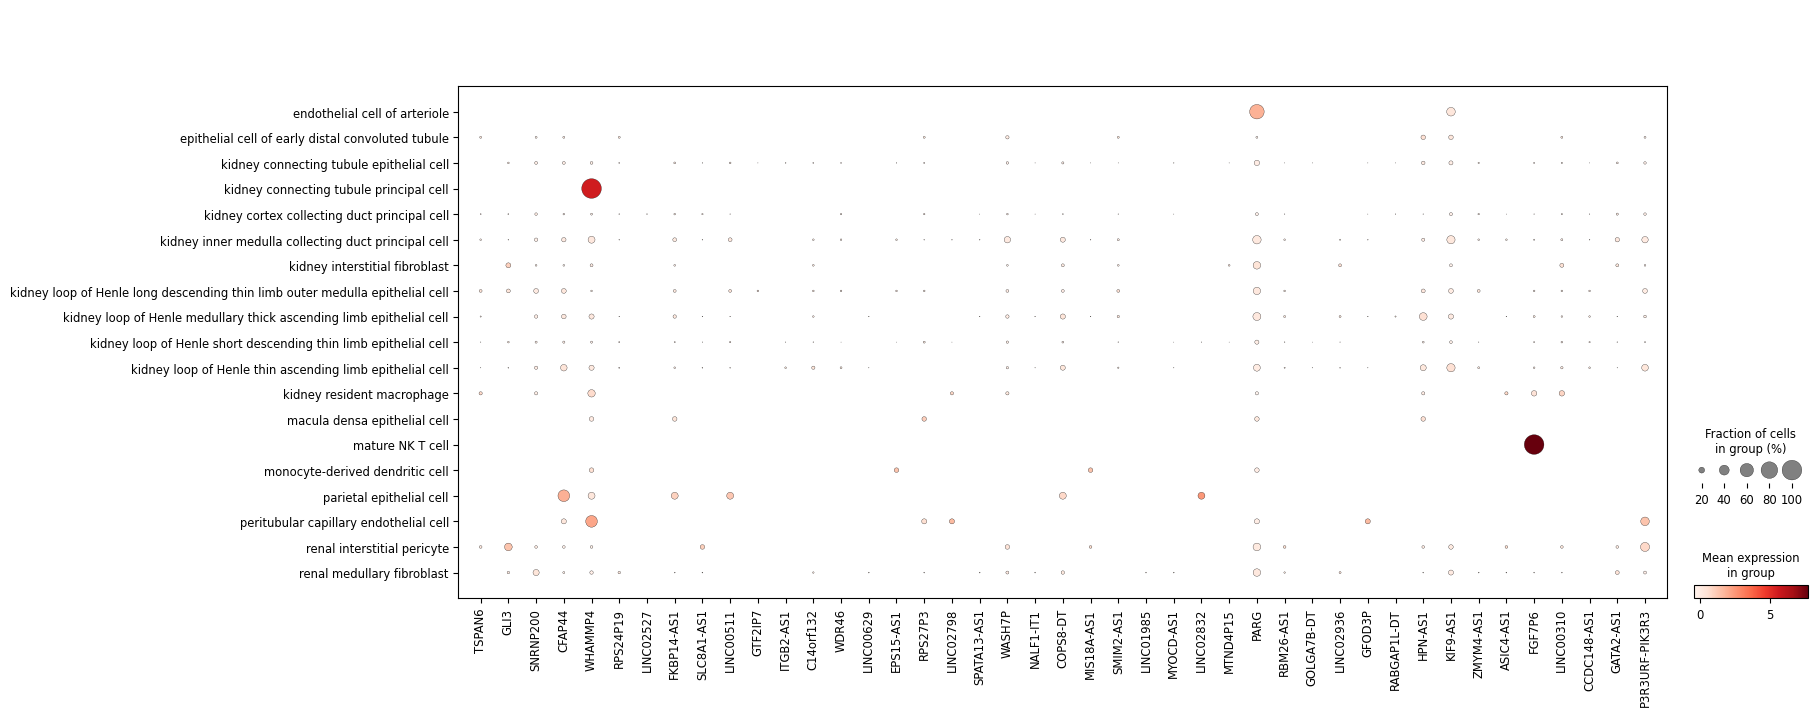

In [62]:
HBM628_QKGB_497_m_df_dotplot3 = HBM628_QKGB_497_m.to_df()
HBM628_QKGB_497_m_df_dotplot3 = HBM628_QKGB_497_m_df_dotplot3.T.reset_index()
HBM628_QKGB_497_m_df_dotplot3['index'] = HBM628_QKGB_497_m_df_dotplot3['index'].apply(match_string)
HBM628_QKGB_497_m_df_dotplot3.set_index('index', inplace=True)
HBM628_QKGB_497_m_adata3 = ad.AnnData(HBM628_QKGB_497_m_df_dotplot3.T)
HBM628_QKGB_497_m_adata3.obs['predicted_label'] = HBM628_QKGB_497_m.obs['predicted_label']
HBM628_QKGB_497_m_adata3.var['hgnc_symbol'] = list(pd.merge(HBM628_QKGB_497_m_adata3.var, annot, on = 'index', how = 'left')['hgnc_symbol'])


HBM628_QKGB_497_m_df_adata3 = HBM628_QKGB_497_m_adata3.to_df()
HBM628_QKGB_497_m_df_adata3.reset_index(inplace=True)
HBM628_QKGB_497_m_df_adata3.set_index('index', inplace=True)
HBM628_QKGB_497_m_df_adata3['predicted_label'] = list(HBM628_QKGB_497_m_adata3.obs['predicted_label'])
HBM628_QKGB_497_barcode_label_adata3 = HBM628_QKGB_497_m_df_adata3['predicted_label'].reset_index()
HBM628_QKGB_497_m_df_adata3 = HBM628_QKGB_497_m_df_adata3.drop('predicted_label', axis = 1)


HBM628_QKGB_497_m_adata3_barcode_label_new = pd.merge(HBM628_QKGB_497_barcode_label_adata3, fifth, on = 'predicted_label', how = 'right')
HBM628_QKGB_497_m_adata3_common = pd.merge(HBM628_QKGB_497_m_df_adata3, HBM628_QKGB_497_m_adata3_barcode_label_new, on = 'index', how = 'right')
HBM628_QKGB_497_m_adata3_common.set_index('index', inplace=True)
HBM628_QKGB_497_m_adata3_common = HBM628_QKGB_497_m_adata3_common.drop('predicted_label', axis = 1)


sc.experimental.pp.highly_variable_genes(HBM628_QKGB_497_m_adata3, flavor="pearson_residuals", n_top_genes= 70)
HBM628_QKGB_497_highly_var3 = HBM628_QKGB_497_m_adata3.var['highly_variable_rank'].reset_index().dropna()
HBM628_QKGB_497_hugo_symbols3 = HBM628_QKGB_497_m_adata3.var['hgnc_symbol'].reset_index()                             
HBM628_QKGB_497_highly_var_hugo3 = pd.merge(HBM628_QKGB_497_highly_var3, HBM628_QKGB_497_hugo_symbols3, on = 'index', how = 'inner')
HBM628_QKGB_497_highly_var_rank3 = HBM628_QKGB_497_highly_var_hugo3['highly_variable_rank']
HBM628_QKGB_497_highly_var_hugo3.set_index('index', inplace=True)
HBM628_QKGB_497_highly_var_hugo3 = HBM628_QKGB_497_highly_var_hugo3.drop('highly_variable_rank', axis = 1)


HBM628_QKGB_497_m_adata3_common = HBM628_QKGB_497_m_adata3_common.T


HBM628_QKGB_497_numeric3 = HBM628_QKGB_497_m_adata3_common.apply(pd.to_numeric)
HBM628_QKGB_497_numeric3.reset_index(inplace=True)
HBM628_QKGB_497_numeric3.set_index('index', inplace=True)
HBM628_QKGB_497_merged_adata_highly_var_for_cell3 = pd.merge(HBM628_QKGB_497_highly_var_hugo3, HBM628_QKGB_497_numeric3, on = "index", how = "right")
HBM628_QKGB_497_merged_adata_highly_var_for_cell3 = HBM628_QKGB_497_merged_adata_highly_var_for_cell3.dropna()
HBM628_QKGB_497_hugo_genes3 = HBM628_QKGB_497_merged_adata_highly_var_for_cell3['hgnc_symbol'].dropna()
HBM628_QKGB_497_hugo_genes3 = HBM628_QKGB_497_hugo_genes3.reset_index()

HBM628_QKGB_497_merged_adata_highly_var_for_cell3 = HBM628_QKGB_497_merged_adata_highly_var_for_cell3.drop('hgnc_symbol', axis = 1)


HBM628_QKGB_497_merged_ready_for_adata3 = HBM628_QKGB_497_merged_adata_highly_var_for_cell3.T
HBM628_QKGB_497_adata_selected3 = ad.AnnData(HBM628_QKGB_497_merged_ready_for_adata3)



HBM628_QKGB_497_adata_selected3.var["hgnc_symbol"] = pd.Categorical(HBM628_QKGB_497_hugo_genes3['hgnc_symbol'])
HBM628_QKGB_497_adata_selected3.obs["predicted_label"] = pd.Categorical(HBM628_QKGB_497_m_adata3_barcode_label_new['predicted_label'])


sc.pl.dotplot(HBM628_QKGB_497_adata_selected3, groupby = 'predicted_label', var_names = HBM628_QKGB_497_hugo_genes3['hgnc_symbol'], gene_symbols = 'hgnc_symbol')

# HBM597_PBJW_593

## Top highly variable genes, original

/opt/anaconda3/lib/python3.12/site-packages/scanpy/experimental/pp/_highly_variable_genes.py:153: UserWarning: `flavor='pearson_residuals'` expects raw count data, but non-integers were found.
  warnings.warn(


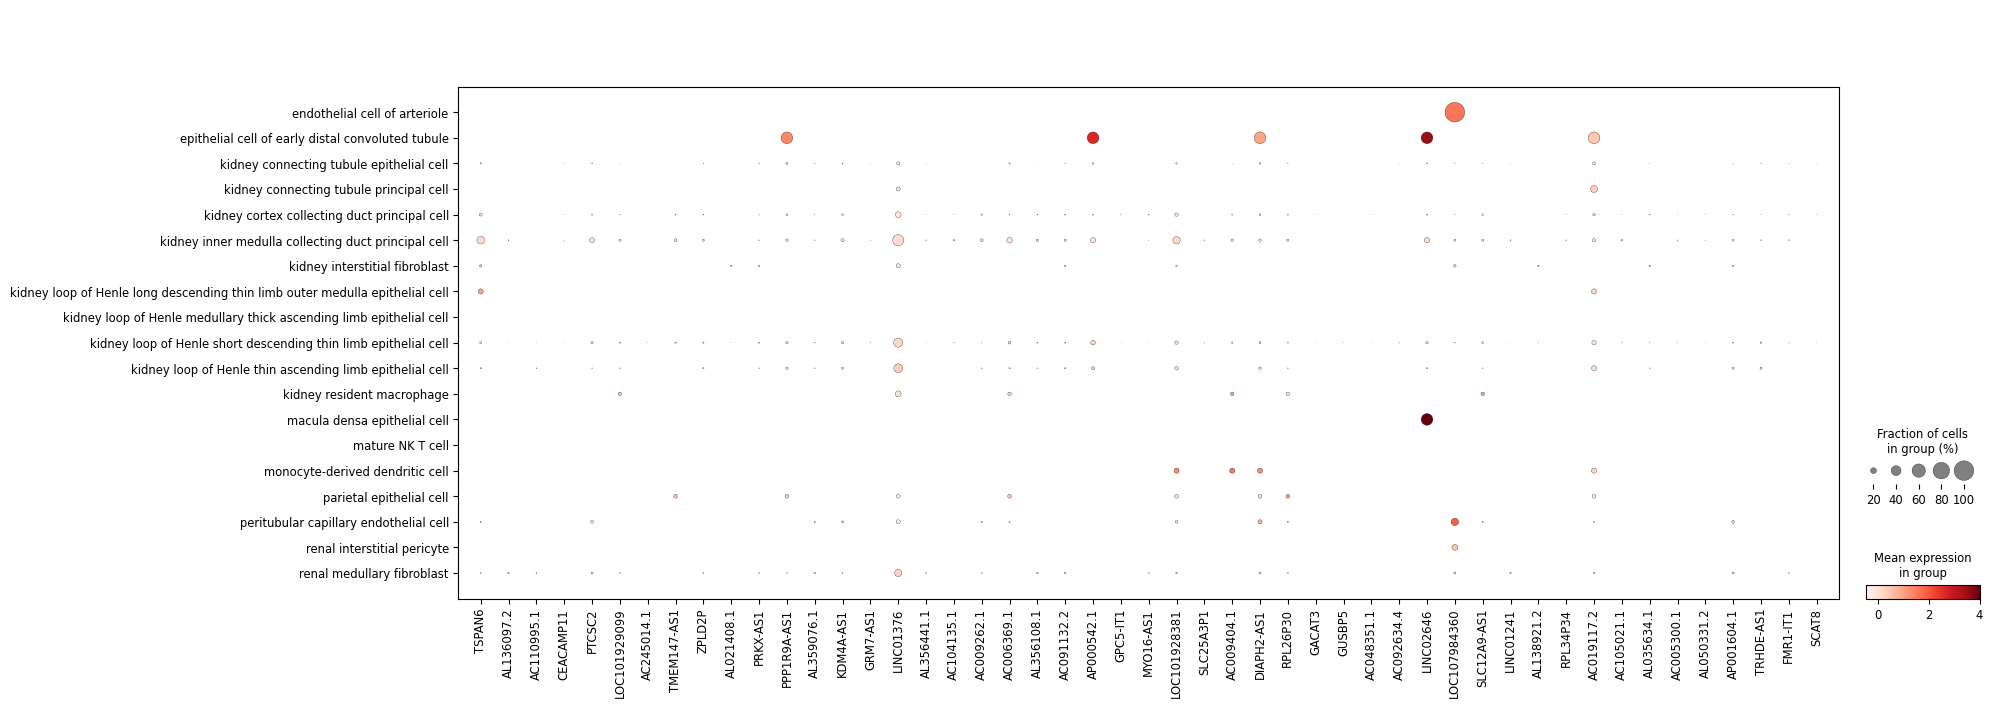

In [63]:
HBM597_PBJW_593_f_df_common = pd.merge(HBM597_PBJW_593_f_df, HBM597_PBJW_593_barcode_label_new, on = 'index', how = 'right')
HBM597_PBJW_593_f_df_common.set_index('index', inplace=True)
HBM597_PBJW_593_f_df_common = HBM597_PBJW_593_f_df_common.drop('predicted_label', axis = 1)


sc.experimental.pp.highly_variable_genes(HBM597_PBJW_593_f, flavor="pearson_residuals", n_top_genes= 50)
HBM597_PBJW_593_highly_var = HBM597_PBJW_593_f.var['highly_variable_rank'].reset_index().dropna()
HBM597_PBJW_593_hugo_symbols = HBM597_PBJW_593_f.var['hugo_symbol'].reset_index()                             
HBM597_PBJW_593_highly_var_hugo = pd.merge(HBM597_PBJW_593_highly_var, HBM597_PBJW_593_hugo_symbols, on = 'index', how = 'inner')
HBM597_PBJW_593_highly_var_rank = HBM597_PBJW_593_highly_var_hugo['highly_variable_rank']
HBM597_PBJW_593_highly_var_hugo.set_index('index', inplace=True)
HBM597_PBJW_593_highly_var_hugo = HBM597_PBJW_593_highly_var_hugo.drop('highly_variable_rank', axis = 1)
    

HBM597_PBJW_593_f_df_common = HBM597_PBJW_593_f_df_common.T


HBM597_PBJW_593_numeric = HBM597_PBJW_593_f_df_common.apply(pd.to_numeric)
HBM597_PBJW_593_numeric.reset_index(inplace=True)
HBM597_PBJW_593_numeric.set_index('index', inplace=True)
HBM597_PBJW_593_merged_adata_highly_var_for_cell = pd.merge(HBM597_PBJW_593_highly_var_hugo, HBM597_PBJW_593_numeric, on = "index", how = "right")
HBM597_PBJW_593_merged_adata_highly_var_for_cell = HBM597_PBJW_593_merged_adata_highly_var_for_cell.dropna()
HBM597_PBJW_593_hugo_genes = HBM597_PBJW_593_merged_adata_highly_var_for_cell['hugo_symbol'].dropna()
HBM597_PBJW_593_hugo_genes = HBM597_PBJW_593_hugo_genes.reset_index()

HBM597_PBJW_593_merged_adata_highly_var_for_cell = HBM597_PBJW_593_merged_adata_highly_var_for_cell.drop('hugo_symbol', axis = 1)


HBM597_PBJW_593_merged_ready_for_adata = HBM597_PBJW_593_merged_adata_highly_var_for_cell.T
HBM597_PBJW_593_adata_selected = ad.AnnData(HBM597_PBJW_593_merged_ready_for_adata)



HBM597_PBJW_593_adata_selected.var["hugo_symbol"] = pd.Categorical(HBM597_PBJW_593_hugo_genes['hugo_symbol'])
HBM597_PBJW_593_adata_selected.obs["predicted_label"] = pd.Categorical(HBM597_PBJW_593_barcode_label_new['predicted_label'])


sc.pl.dotplot(HBM597_PBJW_593_adata_selected, groupby = 'predicted_label', var_names = HBM597_PBJW_593_hugo_genes['hugo_symbol'], gene_symbols = 'hugo_symbol')

## Gene expression of selected genes

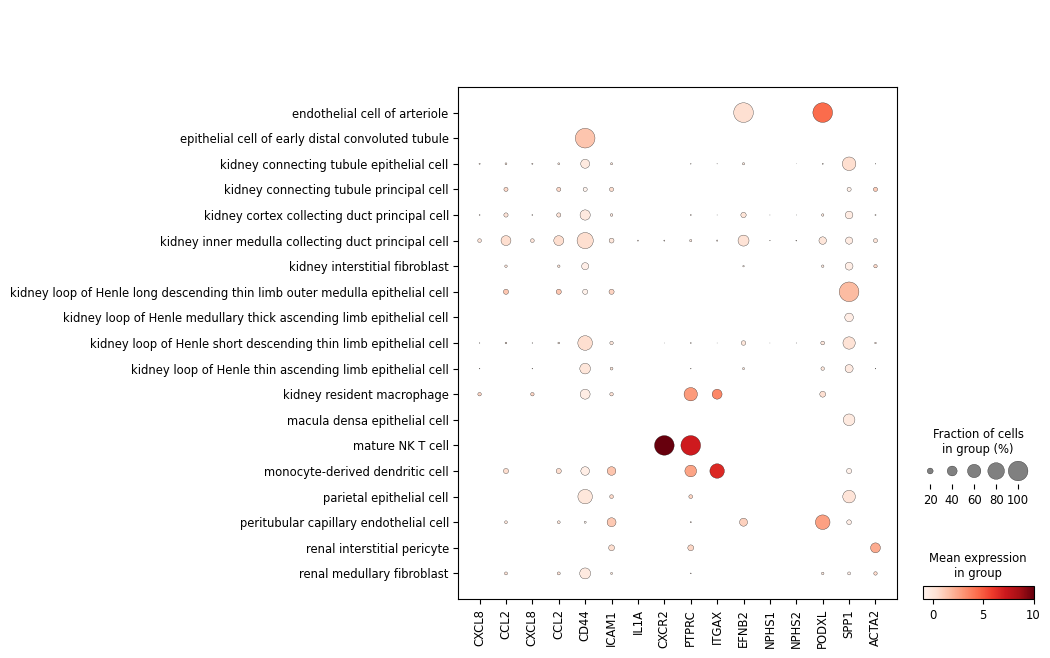

In [64]:
HBM597_PBJW_593_f_df2 = HBM597_PBJW_593_f.to_df()
HBM597_PBJW_593_f_df2 = HBM597_PBJW_593_f_df2.T.reset_index()
HBM597_PBJW_593_f_df2['index'] = HBM597_PBJW_593_f_df2['index'].apply(match_string)
HBM597_PBJW_593_f_df2.set_index('index', inplace=True)
HBM597_PBJW_593_f_adata = ad.AnnData(HBM597_PBJW_593_f_df2.T)
HBM597_PBJW_593_f_adata.obs['predicted_label'] = HBM597_PBJW_593_f.obs['predicted_label']


HBM597_PBJW_593_f_adata.var['hgnc_symbol'] = list(pd.merge(HBM597_PBJW_593_f_adata.var, annot, on = 'index', how = 'left')['hgnc_symbol'])

HBM597_PBJW_593_f_adata2 = HBM597_PBJW_593_f_adata.to_df()
HBM597_PBJW_593_f_adata2.reset_index(inplace=True)
HBM597_PBJW_593_f_adata2.set_index('index', inplace=True)
HBM597_PBJW_593_f_adata2['predicted_label'] = pd.Categorical(HBM597_PBJW_593_f_adata.obs['predicted_label'])
HBM597_PBJW_593_f_adata_barcode_label = HBM597_PBJW_593_f_adata2['predicted_label'].reset_index()
HBM597_PBJW_593_f_adata2 = HBM597_PBJW_593_f_adata2.drop('predicted_label', axis = 1)

HBM597_PBJW_593_f_adata_barcode_label_new = pd.merge(HBM597_PBJW_593_f_adata_barcode_label, fifth, on = 'predicted_label', how = 'right')
HBM597_PBJW_593_f_adata2_common = pd.merge(HBM597_PBJW_593_f_adata2, HBM597_PBJW_593_f_adata_barcode_label_new, on = 'index', how = 'right')
HBM597_PBJW_593_f_adata2_common.set_index('index', inplace=True)
HBM597_PBJW_593_f_adata2_common = HBM597_PBJW_593_f_adata2_common.drop('predicted_label', axis = 1)
HBM597_PBJW_593_f_adata2_numeric = HBM597_PBJW_593_f_adata2_common.apply(pd.to_numeric)
HBM597_PBJW_593_f_adata2_selected = ad.AnnData(HBM597_PBJW_593_f_adata2_numeric)
HBM597_PBJW_593_f_adata2_selected.var["hgnc_symbol"] = pd.Categorical(HBM597_PBJW_593_f_adata.var['hgnc_symbol'])
HBM597_PBJW_593_f_adata2_selected.obs["predicted_label"] = pd.Categorical(HBM597_PBJW_593_f_adata_barcode_label_new['predicted_label'])


gene_list = []

all_selected_genes = ['CXCL8', 'CCL2', 'CXCL8', 'CCL2', 'CD44', 'ICAM1', 'IL1A', 'CXCR2', 'PTPRC', 'ITGAX', 'CSF3', "EFNB2", "NPHS1", "NPHS2", "PODXL", "TPSB2" "C7", "SPP1", "ACTA2"]

for i in all_selected_genes:
    if i in list(HBM597_PBJW_593_f_adata.var['hgnc_symbol'].dropna()):
        gene_list.append(i)

sc.pl.dotplot(HBM597_PBJW_593_f_adata2_selected, groupby = 'predicted_label', var_names = gene_list, gene_symbols = 'hgnc_symbol')

## Top highly variable genes, HGNC annotations from Ensembl

/opt/anaconda3/lib/python3.12/site-packages/scanpy/experimental/pp/_highly_variable_genes.py:153: UserWarning: `flavor='pearson_residuals'` expects raw count data, but non-integers were found.
  warnings.warn(
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


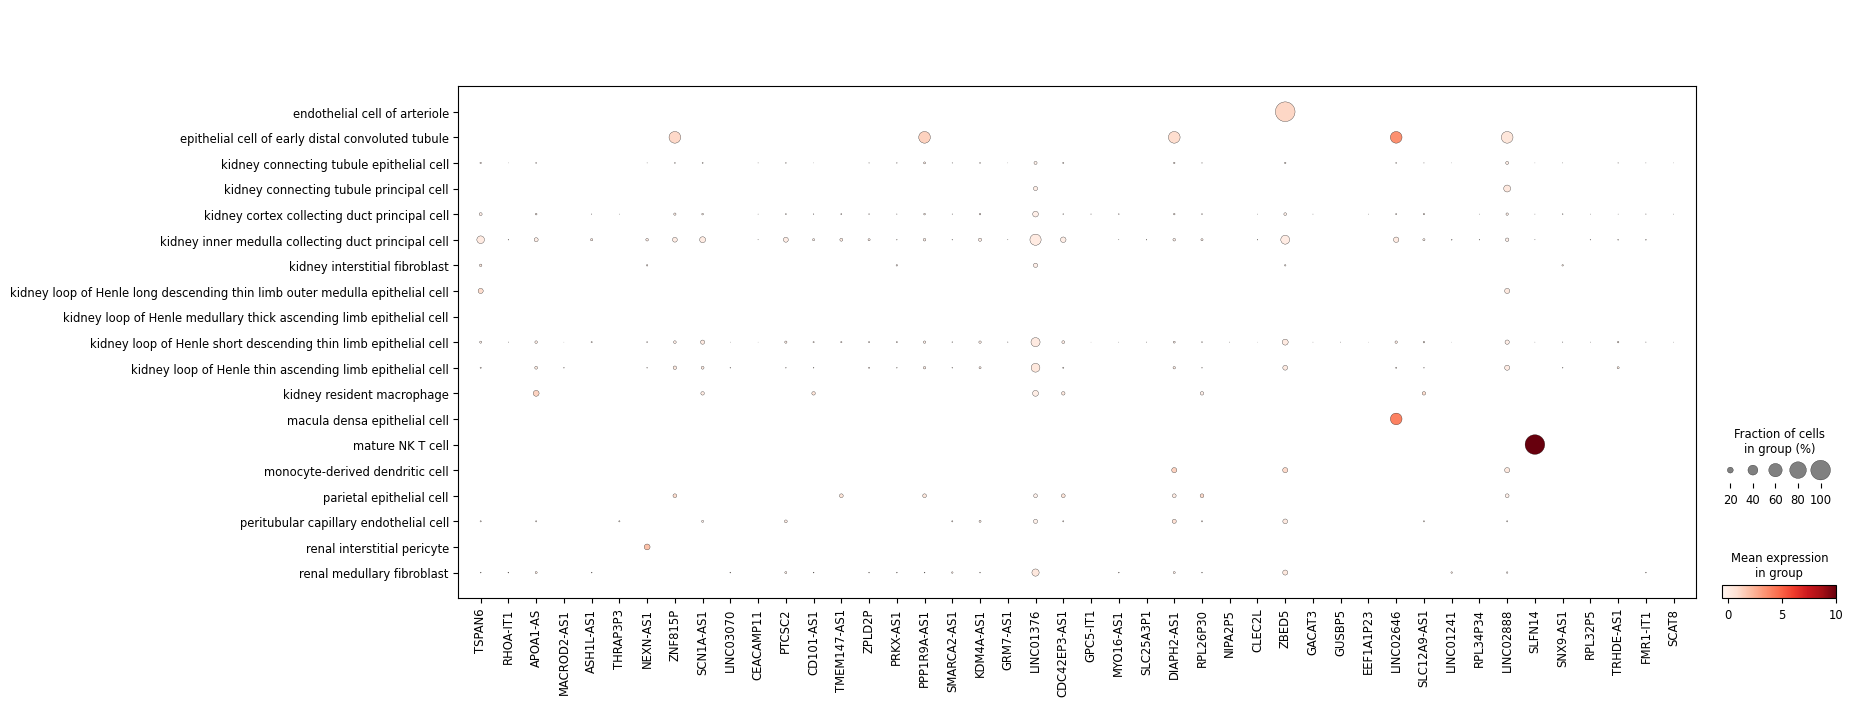

In [20]:
HBM597_PBJW_593_f_df_dotplot3 = HBM597_PBJW_593_f.to_df()
HBM597_PBJW_593_f_df_dotplot3 = HBM597_PBJW_593_f_df_dotplot3.T.reset_index()
HBM597_PBJW_593_f_df_dotplot3['index'] = HBM597_PBJW_593_f_df_dotplot3['index'].apply(match_string)
HBM597_PBJW_593_f_df_dotplot3.set_index('index', inplace=True)
HBM597_PBJW_593_f_adata3 = ad.AnnData(HBM597_PBJW_593_f_df_dotplot3.T)
HBM597_PBJW_593_f_adata3.obs['predicted_label'] = HBM597_PBJW_593_f.obs['predicted_label']
HBM597_PBJW_593_f_adata3.var['hgnc_symbol'] = list(pd.merge(HBM597_PBJW_593_f_adata3.var, annot, on = 'index', how = 'left')['hgnc_symbol'])


HBM597_PBJW_593_f_df_adata3 = HBM597_PBJW_593_f_adata3.to_df()
HBM597_PBJW_593_f_df_adata3.reset_index(inplace=True)
HBM597_PBJW_593_f_df_adata3.set_index('index', inplace=True)
HBM597_PBJW_593_f_df_adata3['predicted_label'] = list(HBM597_PBJW_593_f_adata3.obs['predicted_label'])
HBM597_PBJW_593_barcode_label_adata3 = HBM597_PBJW_593_f_df_adata3['predicted_label'].reset_index()
HBM597_PBJW_593_f_df_adata3 = HBM597_PBJW_593_f_df_adata3.drop('predicted_label', axis = 1)


HBM597_PBJW_593_f_adata3_barcode_label_new = pd.merge(HBM597_PBJW_593_barcode_label_adata3, fifth, on = 'predicted_label', how = 'right')
HBM597_PBJW_593_f_adata3_common = pd.merge(HBM597_PBJW_593_f_df_adata3, HBM597_PBJW_593_f_adata3_barcode_label_new, on = 'index', how = 'right')
HBM597_PBJW_593_f_adata3_common.set_index('index', inplace=True)
HBM597_PBJW_593_f_adata3_common = HBM597_PBJW_593_f_adata3_common.drop('predicted_label', axis = 1)


sc.experimental.pp.highly_variable_genes(HBM597_PBJW_593_f_adata3, flavor="pearson_residuals", n_top_genes= 70)
HBM597_PBJW_593_highly_var3 = HBM597_PBJW_593_f_adata3.var['highly_variable_rank'].reset_index().dropna()
HBM597_PBJW_593_hugo_symbols3 = HBM597_PBJW_593_f_adata3.var['hgnc_symbol'].reset_index()                             
HBM597_PBJW_593_highly_var_hugo3 = pd.merge(HBM597_PBJW_593_highly_var3, HBM597_PBJW_593_hugo_symbols3, on = 'index', how = 'inner')
HBM597_PBJW_593_highly_var_rank3 = HBM597_PBJW_593_highly_var_hugo3['highly_variable_rank']
HBM597_PBJW_593_highly_var_hugo3.set_index('index', inplace=True)
HBM597_PBJW_593_highly_var_hugo3 = HBM597_PBJW_593_highly_var_hugo3.drop('highly_variable_rank', axis = 1)


HBM597_PBJW_593_f_adata3_common = HBM597_PBJW_593_f_adata3_common.T


HBM597_PBJW_593_numeric3 = HBM597_PBJW_593_f_adata3_common.apply(pd.to_numeric)
HBM597_PBJW_593_numeric3.reset_index(inplace=True)
HBM597_PBJW_593_numeric3.set_index('index', inplace=True)
HBM597_PBJW_593_merged_adata_highly_var_for_cell3 = pd.merge(HBM597_PBJW_593_highly_var_hugo3, HBM597_PBJW_593_numeric3, on = "index", how = "right")
HBM597_PBJW_593_merged_adata_highly_var_for_cell3 = HBM597_PBJW_593_merged_adata_highly_var_for_cell3.dropna()
HBM597_PBJW_593_hugo_genes3 = HBM597_PBJW_593_merged_adata_highly_var_for_cell3['hgnc_symbol'].dropna()
HBM597_PBJW_593_hugo_genes3 = HBM597_PBJW_593_hugo_genes3.reset_index()

HBM597_PBJW_593_merged_adata_highly_var_for_cell3 = HBM597_PBJW_593_merged_adata_highly_var_for_cell3.drop('hgnc_symbol', axis = 1)


HBM597_PBJW_593_merged_ready_for_adata3 = HBM597_PBJW_593_merged_adata_highly_var_for_cell3.T
HBM597_PBJW_593_adata_selected3 = ad.AnnData(HBM597_PBJW_593_merged_ready_for_adata3)



HBM597_PBJW_593_adata_selected3.var["hgnc_symbol"] = pd.Categorical(HBM597_PBJW_593_hugo_genes3['hgnc_symbol'])
HBM597_PBJW_593_adata_selected3.obs["predicted_label"] = pd.Categorical(HBM597_PBJW_593_f_adata3_barcode_label_new['predicted_label'])


sc.pl.dotplot(HBM597_PBJW_593_adata_selected3, groupby = 'predicted_label', var_names = HBM597_PBJW_593_hugo_genes3['hgnc_symbol'], gene_symbols = 'hgnc_symbol')

# HBM425_GDJT_648

## Top highly variable genes, original

/opt/anaconda3/lib/python3.12/site-packages/scanpy/experimental/pp/_highly_variable_genes.py:153: UserWarning: `flavor='pearson_residuals'` expects raw count data, but non-integers were found.
  warnings.warn(


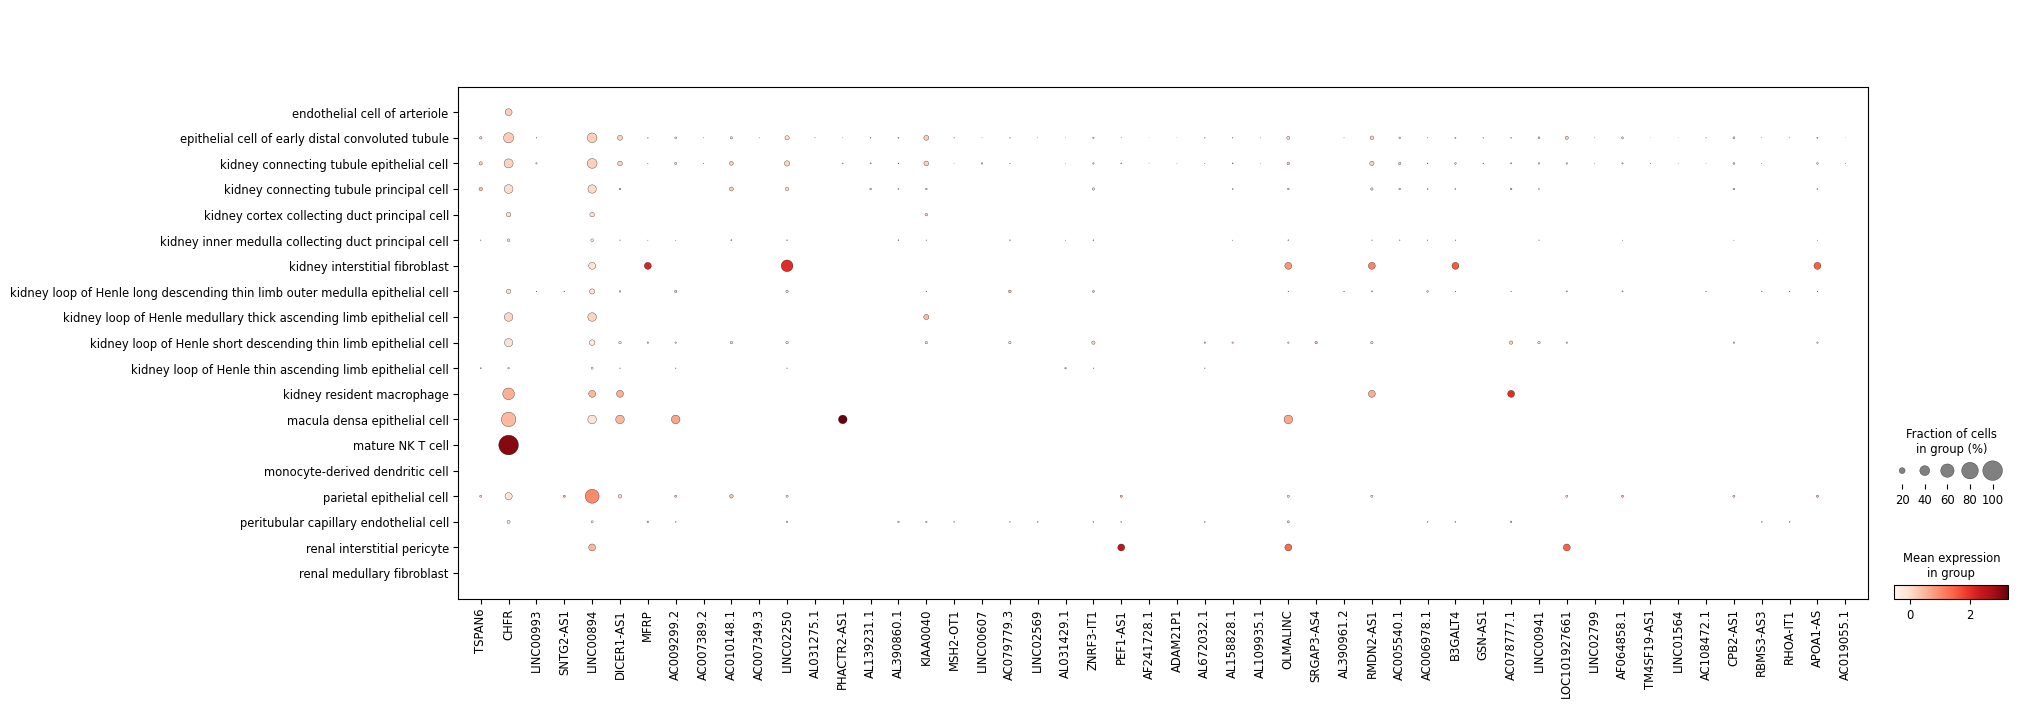

In [21]:
HBM425_GDJT_648_m_df_common = pd.merge(HBM425_GDJT_648_m_df, HBM425_GDJT_648_barcode_label_new, on = 'index', how = 'right')
HBM425_GDJT_648_m_df_common.set_index('index', inplace=True)
HBM425_GDJT_648_m_df_common = HBM425_GDJT_648_m_df_common.drop('predicted_label', axis = 1)


sc.experimental.pp.highly_variable_genes(HBM425_GDJT_648_m, flavor="pearson_residuals", n_top_genes= 50)
HBM425_GDJT_648_highly_var = HBM425_GDJT_648_m.var['highly_variable_rank'].reset_index().dropna()
HBM425_GDJT_648_hugo_symbols = HBM425_GDJT_648_m.var['hugo_symbol'].reset_index()                             
HBM425_GDJT_648_highly_var_hugo = pd.merge(HBM425_GDJT_648_highly_var, HBM425_GDJT_648_hugo_symbols, on = 'index', how = 'inner')
HBM425_GDJT_648_highly_var_rank = HBM425_GDJT_648_highly_var_hugo['highly_variable_rank']
HBM425_GDJT_648_highly_var_hugo.set_index('index', inplace=True)
HBM425_GDJT_648_highly_var_hugo = HBM425_GDJT_648_highly_var_hugo.drop('highly_variable_rank', axis = 1)
    

HBM425_GDJT_648_m_df_common = HBM425_GDJT_648_m_df_common.T


HBM425_GDJT_648_numeric = HBM425_GDJT_648_m_df_common.apply(pd.to_numeric)
HBM425_GDJT_648_numeric.reset_index(inplace=True)
HBM425_GDJT_648_numeric.set_index('index', inplace=True)
HBM425_GDJT_648_merged_adata_highly_var_for_cell = pd.merge(HBM425_GDJT_648_highly_var_hugo, HBM425_GDJT_648_numeric, on = "index", how = "right")
HBM425_GDJT_648_merged_adata_highly_var_for_cell = HBM425_GDJT_648_merged_adata_highly_var_for_cell.dropna()
HBM425_GDJT_648_hugo_genes = HBM425_GDJT_648_merged_adata_highly_var_for_cell['hugo_symbol'].dropna()
HBM425_GDJT_648_hugo_genes = HBM425_GDJT_648_hugo_genes.reset_index()

HBM425_GDJT_648_merged_adata_highly_var_for_cell = HBM425_GDJT_648_merged_adata_highly_var_for_cell.drop('hugo_symbol', axis = 1)


HBM425_GDJT_648_merged_ready_for_adata = HBM425_GDJT_648_merged_adata_highly_var_for_cell.T
HBM425_GDJT_648_adata_selected = ad.AnnData(HBM425_GDJT_648_merged_ready_for_adata)



HBM425_GDJT_648_adata_selected.var["hugo_symbol"] = pd.Categorical(HBM425_GDJT_648_hugo_genes['hugo_symbol'])
HBM425_GDJT_648_adata_selected.obs["predicted_label"] = pd.Categorical(HBM425_GDJT_648_barcode_label_new['predicted_label'])


sc.pl.dotplot(HBM425_GDJT_648_adata_selected, groupby = 'predicted_label', var_names = HBM425_GDJT_648_hugo_genes['hugo_symbol'], gene_symbols = 'hugo_symbol')

## Gene expression of selected genes

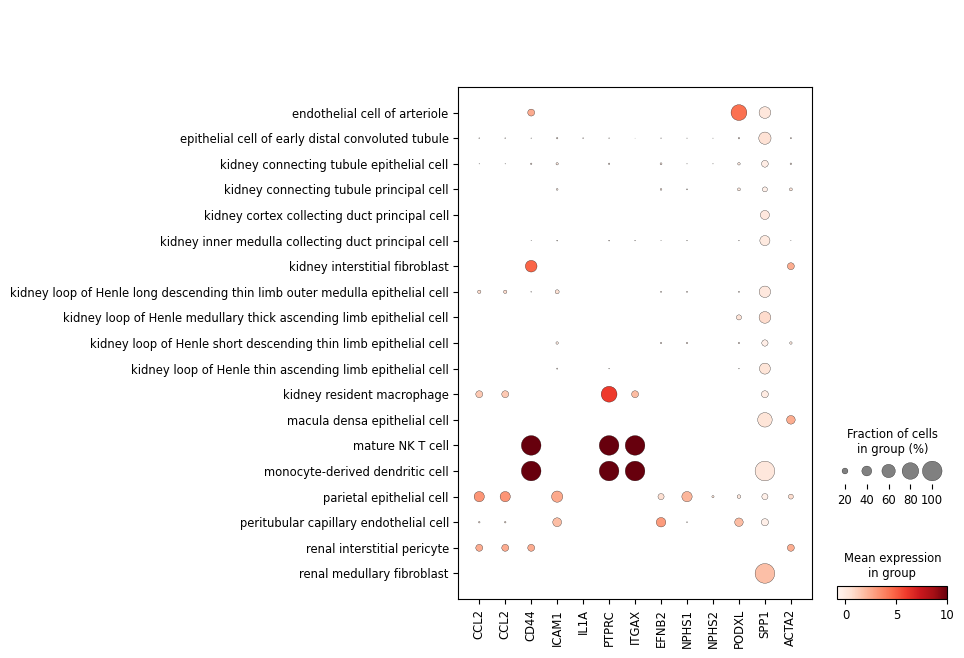

In [22]:
HBM425_GDJT_648_m_df2 = HBM425_GDJT_648_m.to_df()
HBM425_GDJT_648_m_df2 = HBM425_GDJT_648_m_df2.T.reset_index()
HBM425_GDJT_648_m_df2['index'] = HBM425_GDJT_648_m_df2['index'].apply(match_string)
HBM425_GDJT_648_m_df2.set_index('index', inplace=True)
HBM425_GDJT_648_m_adata = ad.AnnData(HBM425_GDJT_648_m_df2.T)
HBM425_GDJT_648_m_adata.obs['predicted_label'] = HBM425_GDJT_648_m.obs['predicted_label']


HBM425_GDJT_648_m_adata.var['hgnc_symbol'] = list(pd.merge(HBM425_GDJT_648_m_adata.var, annot, on = 'index', how = 'left')['hgnc_symbol'])

HBM425_GDJT_648_m_adata2 = HBM425_GDJT_648_m_adata.to_df()
HBM425_GDJT_648_m_adata2.reset_index(inplace=True)
HBM425_GDJT_648_m_adata2.set_index('index', inplace=True)
HBM425_GDJT_648_m_adata2['predicted_label'] = pd.Categorical(HBM425_GDJT_648_m_adata.obs['predicted_label'])
HBM425_GDJT_648_m_adata_barcode_label = HBM425_GDJT_648_m_adata2['predicted_label'].reset_index()
HBM425_GDJT_648_m_adata2 = HBM425_GDJT_648_m_adata2.drop('predicted_label', axis = 1)

HBM425_GDJT_648_m_adata_barcode_label_new = pd.merge(HBM425_GDJT_648_m_adata_barcode_label, fifth, on = 'predicted_label', how = 'right')
HBM425_GDJT_648_m_adata2_common = pd.merge(HBM425_GDJT_648_m_adata2, HBM425_GDJT_648_m_adata_barcode_label_new, on = 'index', how = 'right')
HBM425_GDJT_648_m_adata2_common.set_index('index', inplace=True)
HBM425_GDJT_648_m_adata2_common = HBM425_GDJT_648_m_adata2_common.drop('predicted_label', axis = 1)
HBM425_GDJT_648_m_adata2_numeric = HBM425_GDJT_648_m_adata2_common.apply(pd.to_numeric)
HBM425_GDJT_648_m_adata2_selected = ad.AnnData(HBM425_GDJT_648_m_adata2_numeric)
HBM425_GDJT_648_m_adata2_selected.var["hgnc_symbol"] = pd.Categorical(HBM425_GDJT_648_m_adata.var['hgnc_symbol'])
HBM425_GDJT_648_m_adata2_selected.obs["predicted_label"] = pd.Categorical(HBM425_GDJT_648_m_adata_barcode_label_new['predicted_label'])


gene_list = []

all_selected_genes = ['CXCL8', 'CCL2', 'CXCL8', 'CCL2', 'CD44', 'ICAM1', 'IL1A', 'CXCR2', 'PTPRC', 'ITGAX', 'CSF3', "EFNB2", "NPHS1", "NPHS2", "PODXL", "TPSB2" "C7", "SPP1", "ACTA2"]

for i in all_selected_genes:
    if i in list(HBM425_GDJT_648_m_adata.var['hgnc_symbol'].dropna()):
        gene_list.append(i)

sc.pl.dotplot(HBM425_GDJT_648_m_adata2_selected, groupby = 'predicted_label', var_names = gene_list, gene_symbols = 'hgnc_symbol')

## Top highly variable genes, HGNC annotations from Ensembl

/opt/anaconda3/lib/python3.12/site-packages/scanpy/experimental/pp/_highly_variable_genes.py:153: UserWarning: `flavor='pearson_residuals'` expects raw count data, but non-integers were found.
  warnings.warn(


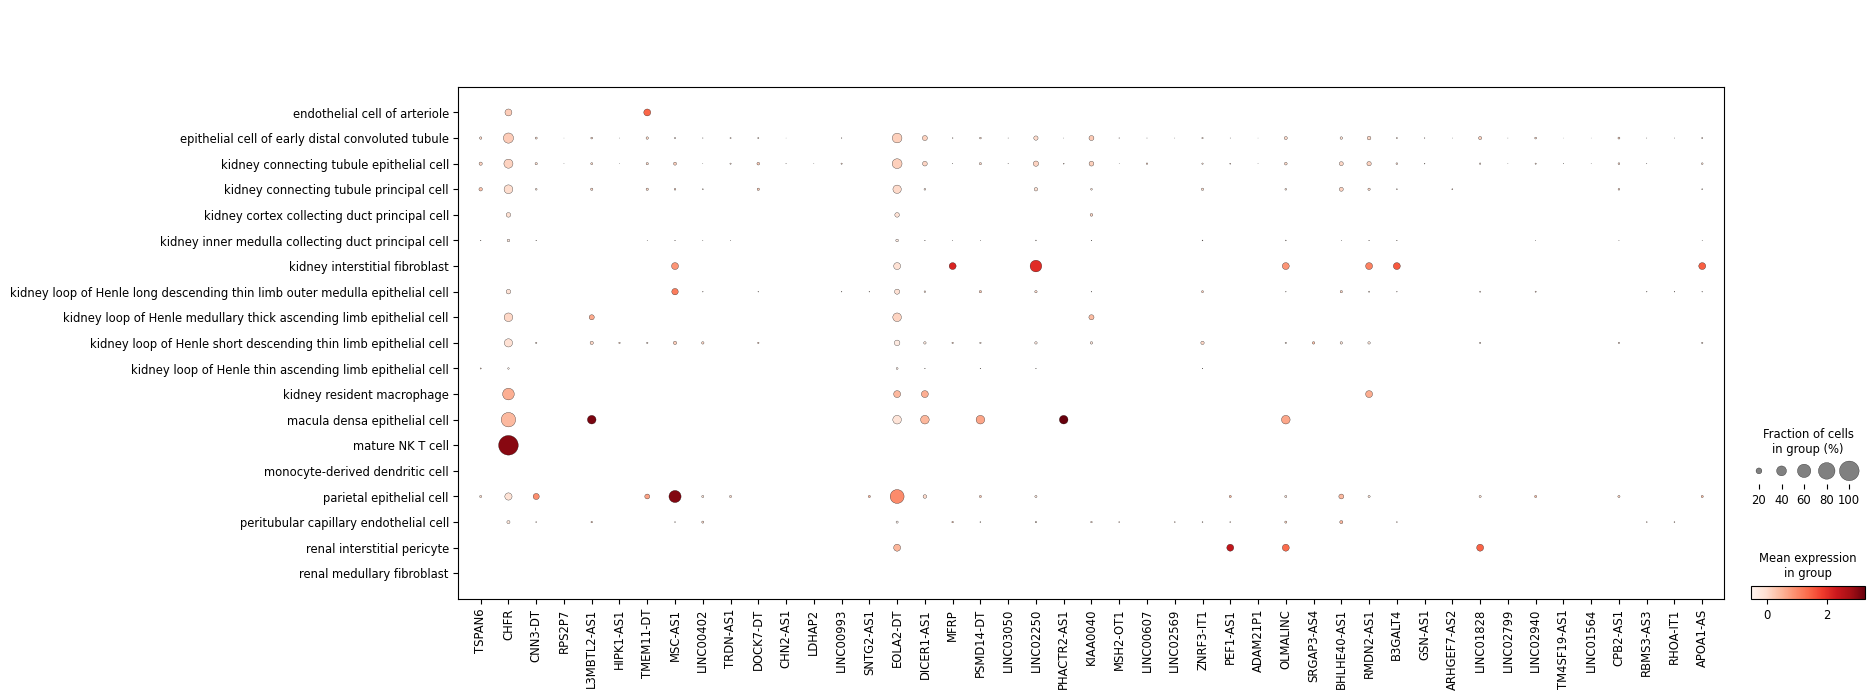

In [23]:
HBM425_GDJT_648_m_df_dotplot3 = HBM425_GDJT_648_m.to_df()
HBM425_GDJT_648_m_df_dotplot3 = HBM425_GDJT_648_m_df_dotplot3.T.reset_index()
HBM425_GDJT_648_m_df_dotplot3['index'] = HBM425_GDJT_648_m_df_dotplot3['index'].apply(match_string)
HBM425_GDJT_648_m_df_dotplot3.set_index('index', inplace=True)
HBM425_GDJT_648_m_adata3 = ad.AnnData(HBM425_GDJT_648_m_df_dotplot3.T)
HBM425_GDJT_648_m_adata3.obs['predicted_label'] = HBM425_GDJT_648_m.obs['predicted_label']
HBM425_GDJT_648_m_adata3.var['hgnc_symbol'] = list(pd.merge(HBM425_GDJT_648_m_adata3.var, annot, on = 'index', how = 'left')['hgnc_symbol'])


HBM425_GDJT_648_m_df_adata3 = HBM425_GDJT_648_m_adata3.to_df()
HBM425_GDJT_648_m_df_adata3.reset_index(inplace=True)
HBM425_GDJT_648_m_df_adata3.set_index('index', inplace=True)
HBM425_GDJT_648_m_df_adata3['predicted_label'] = list(HBM425_GDJT_648_m_adata3.obs['predicted_label'])
HBM425_GDJT_648_barcode_label_adata3 = HBM425_GDJT_648_m_df_adata3['predicted_label'].reset_index()
HBM425_GDJT_648_m_df_adata3 = HBM425_GDJT_648_m_df_adata3.drop('predicted_label', axis = 1)


HBM425_GDJT_648_m_adata3_barcode_label_new = pd.merge(HBM425_GDJT_648_barcode_label_adata3, fifth, on = 'predicted_label', how = 'right')
HBM425_GDJT_648_m_adata3_common = pd.merge(HBM425_GDJT_648_m_df_adata3, HBM425_GDJT_648_m_adata3_barcode_label_new, on = 'index', how = 'right')
HBM425_GDJT_648_m_adata3_common.set_index('index', inplace=True)
HBM425_GDJT_648_m_adata3_common = HBM425_GDJT_648_m_adata3_common.drop('predicted_label', axis = 1)


sc.experimental.pp.highly_variable_genes(HBM425_GDJT_648_m_adata3, flavor="pearson_residuals", n_top_genes= 70)
HBM425_GDJT_648_highly_var3 = HBM425_GDJT_648_m_adata3.var['highly_variable_rank'].reset_index().dropna()
HBM425_GDJT_648_hugo_symbols3 = HBM425_GDJT_648_m_adata3.var['hgnc_symbol'].reset_index()                             
HBM425_GDJT_648_highly_var_hugo3 = pd.merge(HBM425_GDJT_648_highly_var3, HBM425_GDJT_648_hugo_symbols3, on = 'index', how = 'inner')
HBM425_GDJT_648_highly_var_rank3 = HBM425_GDJT_648_highly_var_hugo3['highly_variable_rank']
HBM425_GDJT_648_highly_var_hugo3.set_index('index', inplace=True)
HBM425_GDJT_648_highly_var_hugo3 = HBM425_GDJT_648_highly_var_hugo3.drop('highly_variable_rank', axis = 1)


HBM425_GDJT_648_m_adata3_common = HBM425_GDJT_648_m_adata3_common.T


HBM425_GDJT_648_numeric3 = HBM425_GDJT_648_m_adata3_common.apply(pd.to_numeric)
HBM425_GDJT_648_numeric3.reset_index(inplace=True)
HBM425_GDJT_648_numeric3.set_index('index', inplace=True)
HBM425_GDJT_648_merged_adata_highly_var_for_cell3 = pd.merge(HBM425_GDJT_648_highly_var_hugo3, HBM425_GDJT_648_numeric3, on = "index", how = "right")
HBM425_GDJT_648_merged_adata_highly_var_for_cell3 = HBM425_GDJT_648_merged_adata_highly_var_for_cell3.dropna()
HBM425_GDJT_648_hugo_genes3 = HBM425_GDJT_648_merged_adata_highly_var_for_cell3['hgnc_symbol'].dropna()
HBM425_GDJT_648_hugo_genes3 = HBM425_GDJT_648_hugo_genes3.reset_index()

HBM425_GDJT_648_merged_adata_highly_var_for_cell3 = HBM425_GDJT_648_merged_adata_highly_var_for_cell3.drop('hgnc_symbol', axis = 1)


HBM425_GDJT_648_merged_ready_for_adata3 = HBM425_GDJT_648_merged_adata_highly_var_for_cell3.T
HBM425_GDJT_648_adata_selected3 = ad.AnnData(HBM425_GDJT_648_merged_ready_for_adata3)



HBM425_GDJT_648_adata_selected3.var["hgnc_symbol"] = pd.Categorical(HBM425_GDJT_648_hugo_genes3['hgnc_symbol'])
HBM425_GDJT_648_adata_selected3.obs["predicted_label"] = pd.Categorical(HBM425_GDJT_648_m_adata3_barcode_label_new['predicted_label'])


sc.pl.dotplot(HBM425_GDJT_648_adata_selected3, groupby = 'predicted_label', var_names = HBM425_GDJT_648_hugo_genes3['hgnc_symbol'], gene_symbols = 'hgnc_symbol')